In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("x_train:", x_train.shape)
H = 200
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=1e-5
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H, K)
b1 = np.zeros(H)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)


x_train: (50000, 32, 32, 3)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)


In [4]:
batch_size = 500
epochs= 300
lr = 0.014
lr_decay=0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []

seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(epochs):
    indices = np.arange(Ntr)
    indices = np.split(indices,100) 
    for i in indices:
        rng.shuffle(i)
        x = x_train[i]
        y = y_train[i]
        h = 1.0/(1.0 + np.exp(-(x.dot(w1) + b1)))
        y_pred = h.dot(w2) +b2
        loss = 1./(batch_size*2)*np.square(y_pred - y).sum() + reg * (np.sum(w2 * w2) + np.sum(w1 * w1))
        loss_history.append(loss)
        print('iteration %d / %d: loss %f' %(t, epochs, loss))
        dy_pred = 1./batch_size*2.0*(y_pred -y)
        dw2 = h.T.dot(dy_pred) + reg*w2
        db2 = dy_pred.sum(axis=0)
        dh = dy_pred.dot(w2.T)
        dw1 = x.T.dot(dh*h*(1-h)) + reg*w1
        db1 = (dh*h*(1-h)).sum(axis=0)
        w1 -= lr*dw1
        w2 -= lr*dw2
        b1 -= lr*db1
        b2 -= lr*db2
        lr *= lr_decay

iteration 0 / 300: loss 0.500041
iteration 0 / 300: loss 0.461283
iteration 0 / 300: loss 0.453916
iteration 0 / 300: loss 0.470573
iteration 0 / 300: loss 0.477100
iteration 0 / 300: loss 0.458206
iteration 0 / 300: loss 0.448034
iteration 0 / 300: loss 0.442038
iteration 0 / 300: loss 0.441055
iteration 0 / 300: loss 0.436948
iteration 0 / 300: loss 0.433709
iteration 0 / 300: loss 0.430553
iteration 0 / 300: loss 0.430291
iteration 0 / 300: loss 0.431643
iteration 0 / 300: loss 0.425959
iteration 0 / 300: loss 0.431145
iteration 0 / 300: loss 0.427860
iteration 0 / 300: loss 0.428056
iteration 0 / 300: loss 0.427260
iteration 0 / 300: loss 0.419421
iteration 0 / 300: loss 0.427055
iteration 0 / 300: loss 0.418648
iteration 0 / 300: loss 0.424478
iteration 0 / 300: loss 0.423519
iteration 0 / 300: loss 0.420130
iteration 0 / 300: loss 0.421692
iteration 0 / 300: loss 0.426481
iteration 0 / 300: loss 0.422019
iteration 0 / 300: loss 0.421126
iteration 0 / 300: loss 0.418748
iteration 

iteration 2 / 300: loss 0.382555
iteration 2 / 300: loss 0.387529
iteration 2 / 300: loss 0.384377
iteration 2 / 300: loss 0.386621
iteration 2 / 300: loss 0.374843
iteration 2 / 300: loss 0.380585
iteration 2 / 300: loss 0.377863
iteration 2 / 300: loss 0.378117
iteration 2 / 300: loss 0.380493
iteration 2 / 300: loss 0.378337
iteration 2 / 300: loss 0.378148
iteration 2 / 300: loss 0.380298
iteration 2 / 300: loss 0.388972
iteration 2 / 300: loss 0.386575
iteration 2 / 300: loss 0.392022
iteration 2 / 300: loss 0.380243
iteration 2 / 300: loss 0.377788
iteration 2 / 300: loss 0.382075
iteration 2 / 300: loss 0.378263
iteration 2 / 300: loss 0.378563
iteration 2 / 300: loss 0.378784
iteration 2 / 300: loss 0.378003
iteration 2 / 300: loss 0.381965
iteration 2 / 300: loss 0.384073
iteration 2 / 300: loss 0.372851
iteration 2 / 300: loss 0.379530
iteration 2 / 300: loss 0.384810
iteration 2 / 300: loss 0.379883
iteration 2 / 300: loss 0.381894
iteration 2 / 300: loss 0.389007
iteration 

iteration 5 / 300: loss 0.354602
iteration 5 / 300: loss 0.363447
iteration 5 / 300: loss 0.366208
iteration 5 / 300: loss 0.366089
iteration 5 / 300: loss 0.371446
iteration 5 / 300: loss 0.361410
iteration 5 / 300: loss 0.377949
iteration 5 / 300: loss 0.364164
iteration 5 / 300: loss 0.372837
iteration 5 / 300: loss 0.361945
iteration 5 / 300: loss 0.367295
iteration 5 / 300: loss 0.362931
iteration 5 / 300: loss 0.361869
iteration 5 / 300: loss 0.368588
iteration 5 / 300: loss 0.364457
iteration 5 / 300: loss 0.365231
iteration 5 / 300: loss 0.372756
iteration 5 / 300: loss 0.359486
iteration 5 / 300: loss 0.365680
iteration 5 / 300: loss 0.360510
iteration 5 / 300: loss 0.370296
iteration 5 / 300: loss 0.366033
iteration 5 / 300: loss 0.368502
iteration 5 / 300: loss 0.366754
iteration 5 / 300: loss 0.369361
iteration 5 / 300: loss 0.359479
iteration 5 / 300: loss 0.370538
iteration 5 / 300: loss 0.365045
iteration 5 / 300: loss 0.369315
iteration 5 / 300: loss 0.374189
iteration 

iteration 7 / 300: loss 0.341281
iteration 7 / 300: loss 0.350831
iteration 7 / 300: loss 0.362610
iteration 7 / 300: loss 0.359011
iteration 7 / 300: loss 0.360832
iteration 7 / 300: loss 0.348441
iteration 7 / 300: loss 0.353712
iteration 7 / 300: loss 0.351574
iteration 7 / 300: loss 0.349319
iteration 7 / 300: loss 0.352456
iteration 7 / 300: loss 0.350176
iteration 7 / 300: loss 0.351805
iteration 7 / 300: loss 0.353962
iteration 7 / 300: loss 0.361604
iteration 7 / 300: loss 0.354540
iteration 7 / 300: loss 0.362864
iteration 7 / 300: loss 0.352307
iteration 7 / 300: loss 0.349900
iteration 7 / 300: loss 0.355780
iteration 7 / 300: loss 0.349792
iteration 7 / 300: loss 0.352393
iteration 7 / 300: loss 0.351573
iteration 7 / 300: loss 0.351968
iteration 7 / 300: loss 0.357071
iteration 7 / 300: loss 0.354204
iteration 7 / 300: loss 0.347988
iteration 7 / 300: loss 0.351769
iteration 7 / 300: loss 0.356054
iteration 7 / 300: loss 0.355724
iteration 7 / 300: loss 0.355616
iteration 

iteration 10 / 300: loss 0.339860
iteration 10 / 300: loss 0.342601
iteration 10 / 300: loss 0.343469
iteration 10 / 300: loss 0.347611
iteration 10 / 300: loss 0.337220
iteration 10 / 300: loss 0.357547
iteration 10 / 300: loss 0.340126
iteration 10 / 300: loss 0.354353
iteration 10 / 300: loss 0.340370
iteration 10 / 300: loss 0.342215
iteration 10 / 300: loss 0.335159
iteration 10 / 300: loss 0.338121
iteration 10 / 300: loss 0.346953
iteration 10 / 300: loss 0.344867
iteration 10 / 300: loss 0.340468
iteration 10 / 300: loss 0.348591
iteration 10 / 300: loss 0.338214
iteration 10 / 300: loss 0.339405
iteration 10 / 300: loss 0.335625
iteration 10 / 300: loss 0.348151
iteration 10 / 300: loss 0.340381
iteration 10 / 300: loss 0.348629
iteration 10 / 300: loss 0.347625
iteration 10 / 300: loss 0.346345
iteration 10 / 300: loss 0.334248
iteration 10 / 300: loss 0.349939
iteration 10 / 300: loss 0.342808
iteration 10 / 300: loss 0.345713
iteration 10 / 300: loss 0.350675
iteration 10 /

iteration 12 / 300: loss 0.332306
iteration 12 / 300: loss 0.335075
iteration 12 / 300: loss 0.328388
iteration 12 / 300: loss 0.322864
iteration 12 / 300: loss 0.323131
iteration 12 / 300: loss 0.317858
iteration 12 / 300: loss 0.330913
iteration 12 / 300: loss 0.327689
iteration 12 / 300: loss 0.326346
iteration 12 / 300: loss 0.320653
iteration 12 / 300: loss 0.330372
iteration 12 / 300: loss 0.343410
iteration 12 / 300: loss 0.336958
iteration 12 / 300: loss 0.340836
iteration 12 / 300: loss 0.329044
iteration 12 / 300: loss 0.333982
iteration 12 / 300: loss 0.332068
iteration 12 / 300: loss 0.330374
iteration 12 / 300: loss 0.333638
iteration 12 / 300: loss 0.329136
iteration 12 / 300: loss 0.331170
iteration 12 / 300: loss 0.333844
iteration 12 / 300: loss 0.340032
iteration 12 / 300: loss 0.335404
iteration 12 / 300: loss 0.342538
iteration 12 / 300: loss 0.334207
iteration 12 / 300: loss 0.330100
iteration 12 / 300: loss 0.337875
iteration 12 / 300: loss 0.331590
iteration 12 /

iteration 14 / 300: loss 0.330101
iteration 14 / 300: loss 0.332185
iteration 14 / 300: loss 0.324688
iteration 14 / 300: loss 0.331237
iteration 14 / 300: loss 0.326686
iteration 14 / 300: loss 0.327450
iteration 14 / 300: loss 0.332704
iteration 14 / 300: loss 0.329407
iteration 14 / 300: loss 0.328899
iteration 14 / 300: loss 0.322770
iteration 14 / 300: loss 0.335745
iteration 14 / 300: loss 0.326646
iteration 14 / 300: loss 0.315998
iteration 14 / 300: loss 0.328806
iteration 15 / 300: loss 0.320059
iteration 15 / 300: loss 0.326192
iteration 15 / 300: loss 0.312432
iteration 15 / 300: loss 0.324843
iteration 15 / 300: loss 0.324063
iteration 15 / 300: loss 0.328059
iteration 15 / 300: loss 0.331921
iteration 15 / 300: loss 0.320632
iteration 15 / 300: loss 0.341670
iteration 15 / 300: loss 0.321315
iteration 15 / 300: loss 0.334517
iteration 15 / 300: loss 0.323093
iteration 15 / 300: loss 0.323600
iteration 15 / 300: loss 0.319422
iteration 15 / 300: loss 0.320027
iteration 15 /

iteration 17 / 300: loss 0.325712
iteration 17 / 300: loss 0.331144
iteration 17 / 300: loss 0.311184
iteration 17 / 300: loss 0.322935
iteration 17 / 300: loss 0.320454
iteration 17 / 300: loss 0.327477
iteration 17 / 300: loss 0.319926
iteration 17 / 300: loss 0.315650
iteration 17 / 300: loss 0.315588
iteration 17 / 300: loss 0.327193
iteration 17 / 300: loss 0.331266
iteration 17 / 300: loss 0.315675
iteration 17 / 300: loss 0.320173
iteration 17 / 300: loss 0.317976
iteration 17 / 300: loss 0.322265
iteration 17 / 300: loss 0.316311
iteration 17 / 300: loss 0.309966
iteration 17 / 300: loss 0.309568
iteration 17 / 300: loss 0.306975
iteration 17 / 300: loss 0.318836
iteration 17 / 300: loss 0.313481
iteration 17 / 300: loss 0.313182
iteration 17 / 300: loss 0.309294
iteration 17 / 300: loss 0.316185
iteration 17 / 300: loss 0.329372
iteration 17 / 300: loss 0.323816
iteration 17 / 300: loss 0.327457
iteration 17 / 300: loss 0.315509
iteration 17 / 300: loss 0.318707
iteration 17 /

iteration 19 / 300: loss 0.318035
iteration 19 / 300: loss 0.312143
iteration 19 / 300: loss 0.317486
iteration 19 / 300: loss 0.321895
iteration 19 / 300: loss 0.319462
iteration 19 / 300: loss 0.312231
iteration 19 / 300: loss 0.316567
iteration 19 / 300: loss 0.318219
iteration 19 / 300: loss 0.318472
iteration 19 / 300: loss 0.323111
iteration 19 / 300: loss 0.331231
iteration 19 / 300: loss 0.313424
iteration 19 / 300: loss 0.308415
iteration 19 / 300: loss 0.332162
iteration 19 / 300: loss 0.320885
iteration 19 / 300: loss 0.323329
iteration 19 / 300: loss 0.312867
iteration 19 / 300: loss 0.320200
iteration 19 / 300: loss 0.315981
iteration 19 / 300: loss 0.316506
iteration 19 / 300: loss 0.323646
iteration 19 / 300: loss 0.319135
iteration 19 / 300: loss 0.318481
iteration 19 / 300: loss 0.313126
iteration 19 / 300: loss 0.325179
iteration 19 / 300: loss 0.315602
iteration 19 / 300: loss 0.304632
iteration 19 / 300: loss 0.318198
iteration 20 / 300: loss 0.309539
iteration 20 /

iteration 22 / 300: loss 0.317923
iteration 22 / 300: loss 0.309996
iteration 22 / 300: loss 0.323147
iteration 22 / 300: loss 0.312213
iteration 22 / 300: loss 0.311040
iteration 22 / 300: loss 0.307056
iteration 22 / 300: loss 0.317816
iteration 22 / 300: loss 0.311419
iteration 22 / 300: loss 0.320145
iteration 22 / 300: loss 0.317494
iteration 22 / 300: loss 0.316046
iteration 22 / 300: loss 0.307052
iteration 22 / 300: loss 0.322378
iteration 22 / 300: loss 0.313676
iteration 22 / 300: loss 0.317025
iteration 22 / 300: loss 0.322113
iteration 22 / 300: loss 0.303781
iteration 22 / 300: loss 0.315779
iteration 22 / 300: loss 0.309989
iteration 22 / 300: loss 0.318540
iteration 22 / 300: loss 0.311409
iteration 22 / 300: loss 0.307326
iteration 22 / 300: loss 0.308323
iteration 22 / 300: loss 0.318443
iteration 22 / 300: loss 0.323318
iteration 22 / 300: loss 0.307171
iteration 22 / 300: loss 0.311790
iteration 22 / 300: loss 0.310535
iteration 22 / 300: loss 0.315069
iteration 22 /

iteration 24 / 300: loss 0.307579
iteration 24 / 300: loss 0.311572
iteration 24 / 300: loss 0.306558
iteration 24 / 300: loss 0.309018
iteration 24 / 300: loss 0.310218
iteration 24 / 300: loss 0.314977
iteration 24 / 300: loss 0.311965
iteration 24 / 300: loss 0.320478
iteration 24 / 300: loss 0.311807
iteration 24 / 300: loss 0.309712
iteration 24 / 300: loss 0.314178
iteration 24 / 300: loss 0.308555
iteration 24 / 300: loss 0.310957
iteration 24 / 300: loss 0.305180
iteration 24 / 300: loss 0.311348
iteration 24 / 300: loss 0.315363
iteration 24 / 300: loss 0.313282
iteration 24 / 300: loss 0.305581
iteration 24 / 300: loss 0.311138
iteration 24 / 300: loss 0.310861
iteration 24 / 300: loss 0.310992
iteration 24 / 300: loss 0.318059
iteration 24 / 300: loss 0.324705
iteration 24 / 300: loss 0.309161
iteration 24 / 300: loss 0.302912
iteration 24 / 300: loss 0.325497
iteration 24 / 300: loss 0.313932
iteration 24 / 300: loss 0.316957
iteration 24 / 300: loss 0.307255
iteration 24 /

iteration 27 / 300: loss 0.309471
iteration 27 / 300: loss 0.293707
iteration 27 / 300: loss 0.306613
iteration 27 / 300: loss 0.307125
iteration 27 / 300: loss 0.310668
iteration 27 / 300: loss 0.314408
iteration 27 / 300: loss 0.302162
iteration 27 / 300: loss 0.322782
iteration 27 / 300: loss 0.302750
iteration 27 / 300: loss 0.315401
iteration 27 / 300: loss 0.303697
iteration 27 / 300: loss 0.306582
iteration 27 / 300: loss 0.300673
iteration 27 / 300: loss 0.302593
iteration 27 / 300: loss 0.311580
iteration 27 / 300: loss 0.312732
iteration 27 / 300: loss 0.304854
iteration 27 / 300: loss 0.317180
iteration 27 / 300: loss 0.307188
iteration 27 / 300: loss 0.305060
iteration 27 / 300: loss 0.302187
iteration 27 / 300: loss 0.313043
iteration 27 / 300: loss 0.305781
iteration 27 / 300: loss 0.315686
iteration 27 / 300: loss 0.311901
iteration 27 / 300: loss 0.311090
iteration 27 / 300: loss 0.301779
iteration 27 / 300: loss 0.317442
iteration 27 / 300: loss 0.308942
iteration 27 /

iteration 29 / 300: loss 0.308519
iteration 29 / 300: loss 0.301058
iteration 29 / 300: loss 0.296591
iteration 29 / 300: loss 0.294053
iteration 29 / 300: loss 0.293319
iteration 29 / 300: loss 0.304934
iteration 29 / 300: loss 0.298593
iteration 29 / 300: loss 0.298050
iteration 29 / 300: loss 0.295532
iteration 29 / 300: loss 0.300561
iteration 29 / 300: loss 0.313440
iteration 29 / 300: loss 0.312753
iteration 29 / 300: loss 0.312578
iteration 29 / 300: loss 0.302068
iteration 29 / 300: loss 0.303062
iteration 29 / 300: loss 0.306416
iteration 29 / 300: loss 0.302775
iteration 29 / 300: loss 0.308286
iteration 29 / 300: loss 0.303483
iteration 29 / 300: loss 0.305571
iteration 29 / 300: loss 0.305487
iteration 29 / 300: loss 0.311311
iteration 29 / 300: loss 0.308274
iteration 29 / 300: loss 0.316798
iteration 29 / 300: loss 0.308595
iteration 29 / 300: loss 0.306126
iteration 29 / 300: loss 0.309762
iteration 29 / 300: loss 0.304925
iteration 29 / 300: loss 0.307161
iteration 29 /

iteration 31 / 300: loss 0.303221
iteration 31 / 300: loss 0.307077
iteration 31 / 300: loss 0.304565
iteration 31 / 300: loss 0.303736
iteration 31 / 300: loss 0.312891
iteration 31 / 300: loss 0.308944
iteration 31 / 300: loss 0.307813
iteration 31 / 300: loss 0.303258
iteration 31 / 300: loss 0.314610
iteration 31 / 300: loss 0.305047
iteration 31 / 300: loss 0.292359
iteration 31 / 300: loss 0.305380
iteration 32 / 300: loss 0.299073
iteration 32 / 300: loss 0.306755
iteration 32 / 300: loss 0.289959
iteration 32 / 300: loss 0.302809
iteration 32 / 300: loss 0.304150
iteration 32 / 300: loss 0.306963
iteration 32 / 300: loss 0.311583
iteration 32 / 300: loss 0.298767
iteration 32 / 300: loss 0.319686
iteration 32 / 300: loss 0.300107
iteration 32 / 300: loss 0.311970
iteration 32 / 300: loss 0.300438
iteration 32 / 300: loss 0.304293
iteration 32 / 300: loss 0.297495
iteration 32 / 300: loss 0.299561
iteration 32 / 300: loss 0.308252
iteration 32 / 300: loss 0.309565
iteration 32 /

iteration 34 / 300: loss 0.314694
iteration 34 / 300: loss 0.295780
iteration 34 / 300: loss 0.308436
iteration 34 / 300: loss 0.300605
iteration 34 / 300: loss 0.309279
iteration 34 / 300: loss 0.303031
iteration 34 / 300: loss 0.298410
iteration 34 / 300: loss 0.300148
iteration 34 / 300: loss 0.309541
iteration 34 / 300: loss 0.315364
iteration 34 / 300: loss 0.298069
iteration 34 / 300: loss 0.302141
iteration 34 / 300: loss 0.301867
iteration 34 / 300: loss 0.305969
iteration 34 / 300: loss 0.298557
iteration 34 / 300: loss 0.294299
iteration 34 / 300: loss 0.291866
iteration 34 / 300: loss 0.291346
iteration 34 / 300: loss 0.302937
iteration 34 / 300: loss 0.296594
iteration 34 / 300: loss 0.296198
iteration 34 / 300: loss 0.293163
iteration 34 / 300: loss 0.297736
iteration 34 / 300: loss 0.310619
iteration 34 / 300: loss 0.310762
iteration 34 / 300: loss 0.310169
iteration 34 / 300: loss 0.299921
iteration 34 / 300: loss 0.300904
iteration 34 / 300: loss 0.304553
iteration 34 /

iteration 36 / 300: loss 0.297716
iteration 36 / 300: loss 0.304928
iteration 36 / 300: loss 0.306485
iteration 36 / 300: loss 0.307516
iteration 36 / 300: loss 0.296635
iteration 36 / 300: loss 0.304083
iteration 36 / 300: loss 0.303232
iteration 36 / 300: loss 0.303752
iteration 36 / 300: loss 0.312522
iteration 36 / 300: loss 0.317360
iteration 36 / 300: loss 0.303392
iteration 36 / 300: loss 0.296579
iteration 36 / 300: loss 0.318593
iteration 36 / 300: loss 0.306188
iteration 36 / 300: loss 0.311023
iteration 36 / 300: loss 0.301783
iteration 36 / 300: loss 0.304559
iteration 36 / 300: loss 0.302557
iteration 36 / 300: loss 0.301543
iteration 36 / 300: loss 0.310633
iteration 36 / 300: loss 0.307072
iteration 36 / 300: loss 0.306612
iteration 36 / 300: loss 0.300989
iteration 36 / 300: loss 0.313091
iteration 36 / 300: loss 0.303090
iteration 36 / 300: loss 0.290704
iteration 36 / 300: loss 0.303632
iteration 37 / 300: loss 0.297600
iteration 37 / 300: loss 0.305140
iteration 37 /

iteration 39 / 300: loss 0.297380
iteration 39 / 300: loss 0.305324
iteration 39 / 300: loss 0.306857
iteration 39 / 300: loss 0.299629
iteration 39 / 300: loss 0.311601
iteration 39 / 300: loss 0.301885
iteration 39 / 300: loss 0.299804
iteration 39 / 300: loss 0.297587
iteration 39 / 300: loss 0.307554
iteration 39 / 300: loss 0.299390
iteration 39 / 300: loss 0.310274
iteration 39 / 300: loss 0.306935
iteration 39 / 300: loss 0.305062
iteration 39 / 300: loss 0.296209
iteration 39 / 300: loss 0.311422
iteration 39 / 300: loss 0.303583
iteration 39 / 300: loss 0.307254
iteration 39 / 300: loss 0.313133
iteration 39 / 300: loss 0.294179
iteration 39 / 300: loss 0.307136
iteration 39 / 300: loss 0.298643
iteration 39 / 300: loss 0.307499
iteration 39 / 300: loss 0.301168
iteration 39 / 300: loss 0.296849
iteration 39 / 300: loss 0.298482
iteration 39 / 300: loss 0.308054
iteration 39 / 300: loss 0.314027
iteration 39 / 300: loss 0.295910
iteration 39 / 300: loss 0.300523
iteration 39 /

iteration 41 / 300: loss 0.298194
iteration 41 / 300: loss 0.299351
iteration 41 / 300: loss 0.303091
iteration 41 / 300: loss 0.299418
iteration 41 / 300: loss 0.305087
iteration 41 / 300: loss 0.299651
iteration 41 / 300: loss 0.301380
iteration 41 / 300: loss 0.299586
iteration 41 / 300: loss 0.306651
iteration 41 / 300: loss 0.304457
iteration 41 / 300: loss 0.311795
iteration 41 / 300: loss 0.304338
iteration 41 / 300: loss 0.301862
iteration 41 / 300: loss 0.305314
iteration 41 / 300: loss 0.301021
iteration 41 / 300: loss 0.304058
iteration 41 / 300: loss 0.296237
iteration 41 / 300: loss 0.303631
iteration 41 / 300: loss 0.305112
iteration 41 / 300: loss 0.306634
iteration 41 / 300: loss 0.294875
iteration 41 / 300: loss 0.302428
iteration 41 / 300: loss 0.301488
iteration 41 / 300: loss 0.302535
iteration 41 / 300: loss 0.311473
iteration 41 / 300: loss 0.315729
iteration 41 / 300: loss 0.302044
iteration 41 / 300: loss 0.295280
iteration 41 / 300: loss 0.317095
iteration 41 /

iteration 44 / 300: loss 0.286166
iteration 44 / 300: loss 0.298761
iteration 44 / 300: loss 0.300202
iteration 44 / 300: loss 0.303063
iteration 44 / 300: loss 0.308416
iteration 44 / 300: loss 0.295576
iteration 44 / 300: loss 0.316441
iteration 44 / 300: loss 0.296527
iteration 44 / 300: loss 0.307968
iteration 44 / 300: loss 0.296857
iteration 44 / 300: loss 0.302155
iteration 44 / 300: loss 0.294835
iteration 44 / 300: loss 0.296353
iteration 44 / 300: loss 0.304259
iteration 44 / 300: loss 0.305770
iteration 44 / 300: loss 0.298756
iteration 44 / 300: loss 0.310460
iteration 44 / 300: loss 0.300609
iteration 44 / 300: loss 0.298890
iteration 44 / 300: loss 0.296297
iteration 44 / 300: loss 0.306322
iteration 44 / 300: loss 0.298196
iteration 44 / 300: loss 0.308892
iteration 44 / 300: loss 0.305855
iteration 44 / 300: loss 0.304188
iteration 44 / 300: loss 0.294967
iteration 44 / 300: loss 0.310440
iteration 44 / 300: loss 0.302628
iteration 44 / 300: loss 0.306478
iteration 44 /

iteration 46 / 300: loss 0.302637
iteration 46 / 300: loss 0.295478
iteration 46 / 300: loss 0.291184
iteration 46 / 300: loss 0.287931
iteration 46 / 300: loss 0.288661
iteration 46 / 300: loss 0.300288
iteration 46 / 300: loss 0.294225
iteration 46 / 300: loss 0.293333
iteration 46 / 300: loss 0.290396
iteration 46 / 300: loss 0.294760
iteration 46 / 300: loss 0.307502
iteration 46 / 300: loss 0.308443
iteration 46 / 300: loss 0.307068
iteration 46 / 300: loss 0.297398
iteration 46 / 300: loss 0.298363
iteration 46 / 300: loss 0.302132
iteration 46 / 300: loss 0.298585
iteration 46 / 300: loss 0.304357
iteration 46 / 300: loss 0.298620
iteration 46 / 300: loss 0.300547
iteration 46 / 300: loss 0.298472
iteration 46 / 300: loss 0.305638
iteration 46 / 300: loss 0.303692
iteration 46 / 300: loss 0.310621
iteration 46 / 300: loss 0.303348
iteration 46 / 300: loss 0.300814
iteration 46 / 300: loss 0.304337
iteration 46 / 300: loss 0.300096
iteration 46 / 300: loss 0.303448
iteration 46 /

iteration 48 / 300: loss 0.303581
iteration 48 / 300: loss 0.308781
iteration 48 / 300: loss 0.299322
iteration 48 / 300: loss 0.301307
iteration 48 / 300: loss 0.299979
iteration 48 / 300: loss 0.298891
iteration 48 / 300: loss 0.307749
iteration 48 / 300: loss 0.304367
iteration 48 / 300: loss 0.305016
iteration 48 / 300: loss 0.298338
iteration 48 / 300: loss 0.310571
iteration 48 / 300: loss 0.300654
iteration 48 / 300: loss 0.288804
iteration 48 / 300: loss 0.301652
iteration 49 / 300: loss 0.295198
iteration 49 / 300: loss 0.303308
iteration 49 / 300: loss 0.285452
iteration 49 / 300: loss 0.297854
iteration 49 / 300: loss 0.299167
iteration 49 / 300: loss 0.301990
iteration 49 / 300: loss 0.307672
iteration 49 / 300: loss 0.294956
iteration 49 / 300: loss 0.315847
iteration 49 / 300: loss 0.295714
iteration 49 / 300: loss 0.307136
iteration 49 / 300: loss 0.296078
iteration 49 / 300: loss 0.301426
iteration 49 / 300: loss 0.294287
iteration 49 / 300: loss 0.295572
iteration 49 /

iteration 51 / 300: loss 0.301805
iteration 51 / 300: loss 0.305748
iteration 51 / 300: loss 0.310889
iteration 51 / 300: loss 0.292285
iteration 51 / 300: loss 0.305471
iteration 51 / 300: loss 0.296666
iteration 51 / 300: loss 0.305355
iteration 51 / 300: loss 0.298449
iteration 51 / 300: loss 0.294598
iteration 51 / 300: loss 0.296203
iteration 51 / 300: loss 0.305832
iteration 51 / 300: loss 0.312100
iteration 51 / 300: loss 0.293118
iteration 51 / 300: loss 0.298145
iteration 51 / 300: loss 0.298218
iteration 51 / 300: loss 0.301896
iteration 51 / 300: loss 0.294856
iteration 51 / 300: loss 0.290516
iteration 51 / 300: loss 0.286988
iteration 51 / 300: loss 0.287880
iteration 51 / 300: loss 0.299652
iteration 51 / 300: loss 0.293631
iteration 51 / 300: loss 0.292671
iteration 51 / 300: loss 0.289777
iteration 51 / 300: loss 0.294181
iteration 51 / 300: loss 0.306891
iteration 51 / 300: loss 0.307783
iteration 51 / 300: loss 0.306156
iteration 51 / 300: loss 0.296865
iteration 51 /

iteration 53 / 300: loss 0.299067
iteration 53 / 300: loss 0.302781
iteration 53 / 300: loss 0.294324
iteration 53 / 300: loss 0.302253
iteration 53 / 300: loss 0.303745
iteration 53 / 300: loss 0.305537
iteration 53 / 300: loss 0.292603
iteration 53 / 300: loss 0.300323
iteration 53 / 300: loss 0.299707
iteration 53 / 300: loss 0.300937
iteration 53 / 300: loss 0.309769
iteration 53 / 300: loss 0.313573
iteration 53 / 300: loss 0.300186
iteration 53 / 300: loss 0.293348
iteration 53 / 300: loss 0.315107
iteration 53 / 300: loss 0.303024
iteration 53 / 300: loss 0.308342
iteration 53 / 300: loss 0.298692
iteration 53 / 300: loss 0.300688
iteration 53 / 300: loss 0.299498
iteration 53 / 300: loss 0.298357
iteration 53 / 300: loss 0.307115
iteration 53 / 300: loss 0.303763
iteration 53 / 300: loss 0.304547
iteration 53 / 300: loss 0.297797
iteration 53 / 300: loss 0.309967
iteration 53 / 300: loss 0.300141
iteration 53 / 300: loss 0.288467
iteration 53 / 300: loss 0.301195
iteration 54 /

iteration 56 / 300: loss 0.300701
iteration 56 / 300: loss 0.293798
iteration 56 / 300: loss 0.294917
iteration 56 / 300: loss 0.302979
iteration 56 / 300: loss 0.304302
iteration 56 / 300: loss 0.297148
iteration 56 / 300: loss 0.308803
iteration 56 / 300: loss 0.298811
iteration 56 / 300: loss 0.297455
iteration 56 / 300: loss 0.294338
iteration 56 / 300: loss 0.304327
iteration 56 / 300: loss 0.296485
iteration 56 / 300: loss 0.307234
iteration 56 / 300: loss 0.304101
iteration 56 / 300: loss 0.302741
iteration 56 / 300: loss 0.293165
iteration 56 / 300: loss 0.308742
iteration 56 / 300: loss 0.301407
iteration 56 / 300: loss 0.305338
iteration 56 / 300: loss 0.310402
iteration 56 / 300: loss 0.291850
iteration 56 / 300: loss 0.305102
iteration 56 / 300: loss 0.296286
iteration 56 / 300: loss 0.304931
iteration 56 / 300: loss 0.297964
iteration 56 / 300: loss 0.294137
iteration 56 / 300: loss 0.295764
iteration 56 / 300: loss 0.305445
iteration 56 / 300: loss 0.311718
iteration 56 /

iteration 58 / 300: loss 0.305308
iteration 58 / 300: loss 0.296410
iteration 58 / 300: loss 0.297003
iteration 58 / 300: loss 0.300692
iteration 58 / 300: loss 0.297335
iteration 58 / 300: loss 0.303095
iteration 58 / 300: loss 0.297237
iteration 58 / 300: loss 0.299387
iteration 58 / 300: loss 0.297183
iteration 58 / 300: loss 0.304211
iteration 58 / 300: loss 0.302753
iteration 58 / 300: loss 0.309322
iteration 58 / 300: loss 0.302101
iteration 58 / 300: loss 0.299471
iteration 58 / 300: loss 0.303119
iteration 58 / 300: loss 0.298585
iteration 58 / 300: loss 0.302461
iteration 58 / 300: loss 0.293941
iteration 58 / 300: loss 0.301951
iteration 58 / 300: loss 0.303421
iteration 58 / 300: loss 0.305270
iteration 58 / 300: loss 0.292169
iteration 58 / 300: loss 0.299890
iteration 58 / 300: loss 0.299363
iteration 58 / 300: loss 0.300565
iteration 58 / 300: loss 0.309342
iteration 58 / 300: loss 0.313123
iteration 58 / 300: loss 0.299808
iteration 58 / 300: loss 0.292955
iteration 58 /

iteration 60 / 300: loss 0.300758
iteration 61 / 300: loss 0.294149
iteration 61 / 300: loss 0.302457
iteration 61 / 300: loss 0.284600
iteration 61 / 300: loss 0.296721
iteration 61 / 300: loss 0.298050
iteration 61 / 300: loss 0.300750
iteration 61 / 300: loss 0.306673
iteration 61 / 300: loss 0.294064
iteration 61 / 300: loss 0.315075
iteration 61 / 300: loss 0.294801
iteration 61 / 300: loss 0.306134
iteration 61 / 300: loss 0.295264
iteration 61 / 300: loss 0.300392
iteration 61 / 300: loss 0.293592
iteration 61 / 300: loss 0.294650
iteration 61 / 300: loss 0.302751
iteration 61 / 300: loss 0.304023
iteration 61 / 300: loss 0.296805
iteration 61 / 300: loss 0.308482
iteration 61 / 300: loss 0.298452
iteration 61 / 300: loss 0.297199
iteration 61 / 300: loss 0.293961
iteration 61 / 300: loss 0.303905
iteration 61 / 300: loss 0.296149
iteration 61 / 300: loss 0.306937
iteration 61 / 300: loss 0.303745
iteration 61 / 300: loss 0.302408
iteration 61 / 300: loss 0.292793
iteration 61 /

iteration 63 / 300: loss 0.311410
iteration 63 / 300: loss 0.292247
iteration 63 / 300: loss 0.297290
iteration 63 / 300: loss 0.297338
iteration 63 / 300: loss 0.301010
iteration 63 / 300: loss 0.294071
iteration 63 / 300: loss 0.289693
iteration 63 / 300: loss 0.285937
iteration 63 / 300: loss 0.286944
iteration 63 / 300: loss 0.298852
iteration 63 / 300: loss 0.292942
iteration 63 / 300: loss 0.291936
iteration 63 / 300: loss 0.289030
iteration 63 / 300: loss 0.293501
iteration 63 / 300: loss 0.306230
iteration 63 / 300: loss 0.306986
iteration 63 / 300: loss 0.304950
iteration 63 / 300: loss 0.296215
iteration 63 / 300: loss 0.296753
iteration 63 / 300: loss 0.300405
iteration 63 / 300: loss 0.297087
iteration 63 / 300: loss 0.302821
iteration 63 / 300: loss 0.296966
iteration 63 / 300: loss 0.299157
iteration 63 / 300: loss 0.296940
iteration 63 / 300: loss 0.303947
iteration 63 / 300: loss 0.302564
iteration 63 / 300: loss 0.309093
iteration 63 / 300: loss 0.301874
iteration 63 /

iteration 65 / 300: loss 0.292646
iteration 65 / 300: loss 0.314327
iteration 65 / 300: loss 0.302333
iteration 65 / 300: loss 0.307748
iteration 65 / 300: loss 0.297954
iteration 65 / 300: loss 0.299917
iteration 65 / 300: loss 0.298898
iteration 65 / 300: loss 0.297731
iteration 65 / 300: loss 0.306409
iteration 65 / 300: loss 0.303059
iteration 65 / 300: loss 0.303894
iteration 65 / 300: loss 0.297126
iteration 65 / 300: loss 0.309152
iteration 65 / 300: loss 0.299467
iteration 65 / 300: loss 0.288069
iteration 65 / 300: loss 0.300567
iteration 66 / 300: loss 0.293943
iteration 66 / 300: loss 0.302288
iteration 66 / 300: loss 0.284441
iteration 66 / 300: loss 0.296501
iteration 66 / 300: loss 0.297862
iteration 66 / 300: loss 0.300536
iteration 66 / 300: loss 0.306480
iteration 66 / 300: loss 0.293878
iteration 66 / 300: loss 0.314903
iteration 66 / 300: loss 0.294619
iteration 66 / 300: loss 0.305943
iteration 66 / 300: loss 0.295112
iteration 66 / 300: loss 0.300197
iteration 66 /

iteration 68 / 300: loss 0.292501
iteration 68 / 300: loss 0.308042
iteration 68 / 300: loss 0.300919
iteration 68 / 300: loss 0.304797
iteration 68 / 300: loss 0.309831
iteration 68 / 300: loss 0.291273
iteration 68 / 300: loss 0.304619
iteration 68 / 300: loss 0.295851
iteration 68 / 300: loss 0.304440
iteration 68 / 300: loss 0.297437
iteration 68 / 300: loss 0.293607
iteration 68 / 300: loss 0.295240
iteration 68 / 300: loss 0.304996
iteration 68 / 300: loss 0.311283
iteration 68 / 300: loss 0.292096
iteration 68 / 300: loss 0.297132
iteration 68 / 300: loss 0.297188
iteration 68 / 300: loss 0.300853
iteration 68 / 300: loss 0.293923
iteration 68 / 300: loss 0.289543
iteration 68 / 300: loss 0.285755
iteration 68 / 300: loss 0.286771
iteration 68 / 300: loss 0.298701
iteration 68 / 300: loss 0.292816
iteration 68 / 300: loss 0.291808
iteration 68 / 300: loss 0.288891
iteration 68 / 300: loss 0.293373
iteration 68 / 300: loss 0.306112
iteration 68 / 300: loss 0.306845
iteration 68 /

iteration 70 / 300: loss 0.302733
iteration 70 / 300: loss 0.298023
iteration 70 / 300: loss 0.302081
iteration 70 / 300: loss 0.293512
iteration 70 / 300: loss 0.301572
iteration 70 / 300: loss 0.303026
iteration 70 / 300: loss 0.304946
iteration 70 / 300: loss 0.291700
iteration 70 / 300: loss 0.299402
iteration 70 / 300: loss 0.298955
iteration 70 / 300: loss 0.300113
iteration 70 / 300: loss 0.308814
iteration 70 / 300: loss 0.312602
iteration 70 / 300: loss 0.299368
iteration 70 / 300: loss 0.292525
iteration 70 / 300: loss 0.314189
iteration 70 / 300: loss 0.302206
iteration 70 / 300: loss 0.307623
iteration 70 / 300: loss 0.297818
iteration 70 / 300: loss 0.299773
iteration 70 / 300: loss 0.298782
iteration 70 / 300: loss 0.297619
iteration 70 / 300: loss 0.306292
iteration 70 / 300: loss 0.302933
iteration 70 / 300: loss 0.303766
iteration 70 / 300: loss 0.297001
iteration 70 / 300: loss 0.308999
iteration 70 / 300: loss 0.299339
iteration 70 / 300: loss 0.287993
iteration 70 /

iteration 73 / 300: loss 0.294989
iteration 73 / 300: loss 0.300041
iteration 73 / 300: loss 0.293346
iteration 73 / 300: loss 0.294355
iteration 73 / 300: loss 0.302505
iteration 73 / 300: loss 0.303709
iteration 73 / 300: loss 0.296416
iteration 73 / 300: loss 0.308136
iteration 73 / 300: loss 0.298049
iteration 73 / 300: loss 0.296918
iteration 73 / 300: loss 0.293540
iteration 73 / 300: loss 0.303446
iteration 73 / 300: loss 0.295781
iteration 73 / 300: loss 0.306596
iteration 73 / 300: loss 0.303343
iteration 73 / 300: loss 0.302032
iteration 73 / 300: loss 0.292388
iteration 73 / 300: loss 0.307916
iteration 73 / 300: loss 0.300830
iteration 73 / 300: loss 0.304697
iteration 73 / 300: loss 0.309729
iteration 73 / 300: loss 0.291163
iteration 73 / 300: loss 0.304527
iteration 73 / 300: loss 0.295776
iteration 73 / 300: loss 0.304354
iteration 73 / 300: loss 0.297346
iteration 73 / 300: loss 0.293514
iteration 73 / 300: loss 0.295146
iteration 73 / 300: loss 0.304913
iteration 73 /

iteration 75 / 300: loss 0.306734
iteration 75 / 300: loss 0.304556
iteration 75 / 300: loss 0.295988
iteration 75 / 300: loss 0.296481
iteration 75 / 300: loss 0.300085
iteration 75 / 300: loss 0.296802
iteration 75 / 300: loss 0.302509
iteration 75 / 300: loss 0.296663
iteration 75 / 300: loss 0.298892
iteration 75 / 300: loss 0.296672
iteration 75 / 300: loss 0.303661
iteration 75 / 300: loss 0.302342
iteration 75 / 300: loss 0.308829
iteration 75 / 300: loss 0.301621
iteration 75 / 300: loss 0.299010
iteration 75 / 300: loss 0.302665
iteration 75 / 300: loss 0.297925
iteration 75 / 300: loss 0.302013
iteration 75 / 300: loss 0.293439
iteration 75 / 300: loss 0.301502
iteration 75 / 300: loss 0.302956
iteration 75 / 300: loss 0.304886
iteration 75 / 300: loss 0.291620
iteration 75 / 300: loss 0.299318
iteration 75 / 300: loss 0.298881
iteration 75 / 300: loss 0.300030
iteration 75 / 300: loss 0.308718
iteration 75 / 300: loss 0.312510
iteration 75 / 300: loss 0.299289
iteration 75 /

iteration 77 / 300: loss 0.287932
iteration 77 / 300: loss 0.300348
iteration 78 / 300: loss 0.293712
iteration 78 / 300: loss 0.302098
iteration 78 / 300: loss 0.284261
iteration 78 / 300: loss 0.296253
iteration 78 / 300: loss 0.297660
iteration 78 / 300: loss 0.300304
iteration 78 / 300: loss 0.306266
iteration 78 / 300: loss 0.293667
iteration 78 / 300: loss 0.314696
iteration 78 / 300: loss 0.294407
iteration 78 / 300: loss 0.305730
iteration 78 / 300: loss 0.294939
iteration 78 / 300: loss 0.299980
iteration 78 / 300: loss 0.293302
iteration 78 / 300: loss 0.294304
iteration 78 / 300: loss 0.302463
iteration 78 / 300: loss 0.303655
iteration 78 / 300: loss 0.296348
iteration 78 / 300: loss 0.308078
iteration 78 / 300: loss 0.297980
iteration 78 / 300: loss 0.296869
iteration 78 / 300: loss 0.293466
iteration 78 / 300: loss 0.303369
iteration 78 / 300: loss 0.295719
iteration 78 / 300: loss 0.306535
iteration 78 / 300: loss 0.303273
iteration 78 / 300: loss 0.301967
iteration 78 /

iteration 80 / 300: loss 0.297026
iteration 80 / 300: loss 0.300684
iteration 80 / 300: loss 0.293759
iteration 80 / 300: loss 0.289380
iteration 80 / 300: loss 0.285558
iteration 80 / 300: loss 0.286576
iteration 80 / 300: loss 0.298535
iteration 80 / 300: loss 0.292672
iteration 80 / 300: loss 0.291668
iteration 80 / 300: loss 0.288739
iteration 80 / 300: loss 0.293229
iteration 80 / 300: loss 0.305980
iteration 80 / 300: loss 0.306691
iteration 80 / 300: loss 0.304489
iteration 80 / 300: loss 0.295947
iteration 80 / 300: loss 0.296434
iteration 80 / 300: loss 0.300030
iteration 80 / 300: loss 0.296752
iteration 80 / 300: loss 0.302455
iteration 80 / 300: loss 0.296610
iteration 80 / 300: loss 0.298846
iteration 80 / 300: loss 0.296625
iteration 80 / 300: loss 0.303612
iteration 80 / 300: loss 0.302302
iteration 80 / 300: loss 0.308782
iteration 80 / 300: loss 0.301577
iteration 80 / 300: loss 0.298970
iteration 80 / 300: loss 0.302624
iteration 80 / 300: loss 0.297866
iteration 80 /

iteration 82 / 300: loss 0.299226
iteration 82 / 300: loss 0.292391
iteration 82 / 300: loss 0.314041
iteration 82 / 300: loss 0.302065
iteration 82 / 300: loss 0.307480
iteration 82 / 300: loss 0.297666
iteration 82 / 300: loss 0.299615
iteration 82 / 300: loss 0.298650
iteration 82 / 300: loss 0.297497
iteration 82 / 300: loss 0.306167
iteration 82 / 300: loss 0.302796
iteration 82 / 300: loss 0.303624
iteration 82 / 300: loss 0.296862
iteration 82 / 300: loss 0.308830
iteration 82 / 300: loss 0.299198
iteration 82 / 300: loss 0.287908
iteration 82 / 300: loss 0.300309
iteration 83 / 300: loss 0.293672
iteration 83 / 300: loss 0.302066
iteration 83 / 300: loss 0.284230
iteration 83 / 300: loss 0.296210
iteration 83 / 300: loss 0.297626
iteration 83 / 300: loss 0.300264
iteration 83 / 300: loss 0.306229
iteration 83 / 300: loss 0.293630
iteration 83 / 300: loss 0.314658
iteration 83 / 300: loss 0.294370
iteration 83 / 300: loss 0.305693
iteration 83 / 300: loss 0.294909
iteration 83 /

iteration 85 / 300: loss 0.303219
iteration 85 / 300: loss 0.301916
iteration 85 / 300: loss 0.292266
iteration 85 / 300: loss 0.307779
iteration 85 / 300: loss 0.300733
iteration 85 / 300: loss 0.304587
iteration 85 / 300: loss 0.309617
iteration 85 / 300: loss 0.291040
iteration 85 / 300: loss 0.304425
iteration 85 / 300: loss 0.295694
iteration 85 / 300: loss 0.304261
iteration 85 / 300: loss 0.297247
iteration 85 / 300: loss 0.293413
iteration 85 / 300: loss 0.295043
iteration 85 / 300: loss 0.304820
iteration 85 / 300: loss 0.311114
iteration 85 / 300: loss 0.291904
iteration 85 / 300: loss 0.296929
iteration 85 / 300: loss 0.296998
iteration 85 / 300: loss 0.300655
iteration 85 / 300: loss 0.293730
iteration 85 / 300: loss 0.289352
iteration 85 / 300: loss 0.285524
iteration 85 / 300: loss 0.286542
iteration 85 / 300: loss 0.298506
iteration 85 / 300: loss 0.292646
iteration 85 / 300: loss 0.291643
iteration 85 / 300: loss 0.288713
iteration 85 / 300: loss 0.293205
iteration 85 /

iteration 87 / 300: loss 0.302592
iteration 87 / 300: loss 0.297820
iteration 87 / 300: loss 0.301938
iteration 87 / 300: loss 0.293359
iteration 87 / 300: loss 0.301424
iteration 87 / 300: loss 0.302879
iteration 87 / 300: loss 0.304821
iteration 87 / 300: loss 0.291534
iteration 87 / 300: loss 0.299227
iteration 87 / 300: loss 0.298800
iteration 87 / 300: loss 0.299940
iteration 87 / 300: loss 0.308614
iteration 87 / 300: loss 0.312410
iteration 87 / 300: loss 0.299202
iteration 87 / 300: loss 0.292368
iteration 87 / 300: loss 0.314016
iteration 87 / 300: loss 0.302041
iteration 87 / 300: loss 0.307455
iteration 87 / 300: loss 0.297639
iteration 87 / 300: loss 0.299588
iteration 87 / 300: loss 0.298628
iteration 87 / 300: loss 0.297477
iteration 87 / 300: loss 0.306146
iteration 87 / 300: loss 0.302773
iteration 87 / 300: loss 0.303600
iteration 87 / 300: loss 0.296838
iteration 87 / 300: loss 0.308802
iteration 87 / 300: loss 0.299174
iteration 87 / 300: loss 0.287893
iteration 87 /

iteration 90 / 300: loss 0.303595
iteration 90 / 300: loss 0.296274
iteration 90 / 300: loss 0.308016
iteration 90 / 300: loss 0.297904
iteration 90 / 300: loss 0.296817
iteration 90 / 300: loss 0.293386
iteration 90 / 300: loss 0.303287
iteration 90 / 300: loss 0.295652
iteration 90 / 300: loss 0.306470
iteration 90 / 300: loss 0.303198
iteration 90 / 300: loss 0.301896
iteration 90 / 300: loss 0.292246
iteration 90 / 300: loss 0.307755
iteration 90 / 300: loss 0.300716
iteration 90 / 300: loss 0.304569
iteration 90 / 300: loss 0.309598
iteration 90 / 300: loss 0.291019
iteration 90 / 300: loss 0.304407
iteration 90 / 300: loss 0.295680
iteration 90 / 300: loss 0.304245
iteration 90 / 300: loss 0.297230
iteration 90 / 300: loss 0.293396
iteration 90 / 300: loss 0.295025
iteration 90 / 300: loss 0.304804
iteration 90 / 300: loss 0.311099
iteration 90 / 300: loss 0.291886
iteration 90 / 300: loss 0.296911
iteration 90 / 300: loss 0.296981
iteration 90 / 300: loss 0.300638
iteration 90 /

iteration 92 / 300: loss 0.295903
iteration 92 / 300: loss 0.296385
iteration 92 / 300: loss 0.299969
iteration 92 / 300: loss 0.296697
iteration 92 / 300: loss 0.302397
iteration 92 / 300: loss 0.296553
iteration 92 / 300: loss 0.298794
iteration 92 / 300: loss 0.296576
iteration 92 / 300: loss 0.303559
iteration 92 / 300: loss 0.302259
iteration 92 / 300: loss 0.308730
iteration 92 / 300: loss 0.301529
iteration 92 / 300: loss 0.298927
iteration 92 / 300: loss 0.302579
iteration 92 / 300: loss 0.297802
iteration 92 / 300: loss 0.301926
iteration 92 / 300: loss 0.293346
iteration 92 / 300: loss 0.301411
iteration 92 / 300: loss 0.302865
iteration 92 / 300: loss 0.304810
iteration 92 / 300: loss 0.291520
iteration 92 / 300: loss 0.299211
iteration 92 / 300: loss 0.298786
iteration 92 / 300: loss 0.299925
iteration 92 / 300: loss 0.308596
iteration 92 / 300: loss 0.312393
iteration 92 / 300: loss 0.299187
iteration 92 / 300: loss 0.292354
iteration 92 / 300: loss 0.314001
iteration 92 /

iteration 94 / 300: loss 0.300267
iteration 95 / 300: loss 0.293628
iteration 95 / 300: loss 0.302030
iteration 95 / 300: loss 0.284196
iteration 95 / 300: loss 0.296163
iteration 95 / 300: loss 0.297589
iteration 95 / 300: loss 0.300221
iteration 95 / 300: loss 0.306190
iteration 95 / 300: loss 0.293590
iteration 95 / 300: loss 0.314617
iteration 95 / 300: loss 0.294330
iteration 95 / 300: loss 0.305653
iteration 95 / 300: loss 0.294876
iteration 95 / 300: loss 0.299901
iteration 95 / 300: loss 0.293245
iteration 95 / 300: loss 0.294239
iteration 95 / 300: loss 0.302410
iteration 95 / 300: loss 0.303585
iteration 95 / 300: loss 0.296261
iteration 95 / 300: loss 0.308005
iteration 95 / 300: loss 0.297892
iteration 95 / 300: loss 0.296808
iteration 95 / 300: loss 0.293373
iteration 95 / 300: loss 0.303273
iteration 95 / 300: loss 0.295640
iteration 95 / 300: loss 0.306459
iteration 95 / 300: loss 0.303185
iteration 95 / 300: loss 0.301884
iteration 95 / 300: loss 0.292233
iteration 95 /

iteration 97 / 300: loss 0.296968
iteration 97 / 300: loss 0.300624
iteration 97 / 300: loss 0.293700
iteration 97 / 300: loss 0.289323
iteration 97 / 300: loss 0.285487
iteration 97 / 300: loss 0.286505
iteration 97 / 300: loss 0.298475
iteration 97 / 300: loss 0.292619
iteration 97 / 300: loss 0.291617
iteration 97 / 300: loss 0.288685
iteration 97 / 300: loss 0.293178
iteration 97 / 300: loss 0.305932
iteration 97 / 300: loss 0.306636
iteration 97 / 300: loss 0.304404
iteration 97 / 300: loss 0.295896
iteration 97 / 300: loss 0.296376
iteration 97 / 300: loss 0.299959
iteration 97 / 300: loss 0.296688
iteration 97 / 300: loss 0.302387
iteration 97 / 300: loss 0.296543
iteration 97 / 300: loss 0.298786
iteration 97 / 300: loss 0.296567
iteration 97 / 300: loss 0.303551
iteration 97 / 300: loss 0.302252
iteration 97 / 300: loss 0.308721
iteration 97 / 300: loss 0.301521
iteration 97 / 300: loss 0.298920
iteration 97 / 300: loss 0.302572
iteration 97 / 300: loss 0.297791
iteration 97 /

iteration 99 / 300: loss 0.313989
iteration 99 / 300: loss 0.302015
iteration 99 / 300: loss 0.307427
iteration 99 / 300: loss 0.297611
iteration 99 / 300: loss 0.299559
iteration 99 / 300: loss 0.298603
iteration 99 / 300: loss 0.297454
iteration 99 / 300: loss 0.306123
iteration 99 / 300: loss 0.302748
iteration 99 / 300: loss 0.303573
iteration 99 / 300: loss 0.296812
iteration 99 / 300: loss 0.308770
iteration 99 / 300: loss 0.299148
iteration 99 / 300: loss 0.287877
iteration 99 / 300: loss 0.300260
iteration 100 / 300: loss 0.293621
iteration 100 / 300: loss 0.302024
iteration 100 / 300: loss 0.284190
iteration 100 / 300: loss 0.296155
iteration 100 / 300: loss 0.297582
iteration 100 / 300: loss 0.300214
iteration 100 / 300: loss 0.306183
iteration 100 / 300: loss 0.293583
iteration 100 / 300: loss 0.314610
iteration 100 / 300: loss 0.294323
iteration 100 / 300: loss 0.305647
iteration 100 / 300: loss 0.294871
iteration 100 / 300: loss 0.299894
iteration 100 / 300: loss 0.293240


iteration 102 / 300: loss 0.295632
iteration 102 / 300: loss 0.306450
iteration 102 / 300: loss 0.303175
iteration 102 / 300: loss 0.301875
iteration 102 / 300: loss 0.292223
iteration 102 / 300: loss 0.307730
iteration 102 / 300: loss 0.300698
iteration 102 / 300: loss 0.304549
iteration 102 / 300: loss 0.309578
iteration 102 / 300: loss 0.290996
iteration 102 / 300: loss 0.304388
iteration 102 / 300: loss 0.295665
iteration 102 / 300: loss 0.304228
iteration 102 / 300: loss 0.297212
iteration 102 / 300: loss 0.293378
iteration 102 / 300: loss 0.295006
iteration 102 / 300: loss 0.304786
iteration 102 / 300: loss 0.311082
iteration 102 / 300: loss 0.291868
iteration 102 / 300: loss 0.296892
iteration 102 / 300: loss 0.296963
iteration 102 / 300: loss 0.300619
iteration 102 / 300: loss 0.293694
iteration 102 / 300: loss 0.289317
iteration 102 / 300: loss 0.285481
iteration 102 / 300: loss 0.286499
iteration 102 / 300: loss 0.298470
iteration 102 / 300: loss 0.292614
iteration 102 / 300:

iteration 104 / 300: loss 0.296370
iteration 104 / 300: loss 0.299951
iteration 104 / 300: loss 0.296681
iteration 104 / 300: loss 0.302379
iteration 104 / 300: loss 0.296536
iteration 104 / 300: loss 0.298779
iteration 104 / 300: loss 0.296561
iteration 104 / 300: loss 0.303544
iteration 104 / 300: loss 0.302246
iteration 104 / 300: loss 0.308715
iteration 104 / 300: loss 0.301515
iteration 104 / 300: loss 0.298914
iteration 104 / 300: loss 0.302566
iteration 104 / 300: loss 0.297783
iteration 104 / 300: loss 0.301912
iteration 104 / 300: loss 0.293331
iteration 104 / 300: loss 0.301397
iteration 104 / 300: loss 0.302851
iteration 104 / 300: loss 0.304798
iteration 104 / 300: loss 0.291504
iteration 104 / 300: loss 0.299195
iteration 104 / 300: loss 0.298771
iteration 104 / 300: loss 0.299908
iteration 104 / 300: loss 0.308577
iteration 104 / 300: loss 0.312375
iteration 104 / 300: loss 0.299171
iteration 104 / 300: loss 0.292339
iteration 104 / 300: loss 0.313984
iteration 104 / 300:

iteration 106 / 300: loss 0.299142
iteration 106 / 300: loss 0.287873
iteration 106 / 300: loss 0.300254
iteration 107 / 300: loss 0.293615
iteration 107 / 300: loss 0.302019
iteration 107 / 300: loss 0.284185
iteration 107 / 300: loss 0.296149
iteration 107 / 300: loss 0.297578
iteration 107 / 300: loss 0.300209
iteration 107 / 300: loss 0.306178
iteration 107 / 300: loss 0.293578
iteration 107 / 300: loss 0.314605
iteration 107 / 300: loss 0.294318
iteration 107 / 300: loss 0.305641
iteration 107 / 300: loss 0.294866
iteration 107 / 300: loss 0.299888
iteration 107 / 300: loss 0.293236
iteration 107 / 300: loss 0.294228
iteration 107 / 300: loss 0.302402
iteration 107 / 300: loss 0.303574
iteration 107 / 300: loss 0.296247
iteration 107 / 300: loss 0.307994
iteration 107 / 300: loss 0.297878
iteration 107 / 300: loss 0.296798
iteration 107 / 300: loss 0.293358
iteration 107 / 300: loss 0.303258
iteration 107 / 300: loss 0.295628
iteration 107 / 300: loss 0.306447
iteration 107 / 300:

iteration 109 / 300: loss 0.304384
iteration 109 / 300: loss 0.295662
iteration 109 / 300: loss 0.304224
iteration 109 / 300: loss 0.297208
iteration 109 / 300: loss 0.293374
iteration 109 / 300: loss 0.295002
iteration 109 / 300: loss 0.304782
iteration 109 / 300: loss 0.311079
iteration 109 / 300: loss 0.291864
iteration 109 / 300: loss 0.296888
iteration 109 / 300: loss 0.296960
iteration 109 / 300: loss 0.300615
iteration 109 / 300: loss 0.293690
iteration 109 / 300: loss 0.289314
iteration 109 / 300: loss 0.285476
iteration 109 / 300: loss 0.286494
iteration 109 / 300: loss 0.298466
iteration 109 / 300: loss 0.292610
iteration 109 / 300: loss 0.291609
iteration 109 / 300: loss 0.288676
iteration 109 / 300: loss 0.293170
iteration 109 / 300: loss 0.305924
iteration 109 / 300: loss 0.306627
iteration 109 / 300: loss 0.304391
iteration 109 / 300: loss 0.295888
iteration 109 / 300: loss 0.296367
iteration 109 / 300: loss 0.299948
iteration 109 / 300: loss 0.296678
iteration 109 / 300:

iteration 111 / 300: loss 0.301512
iteration 111 / 300: loss 0.298911
iteration 111 / 300: loss 0.302563
iteration 111 / 300: loss 0.297779
iteration 111 / 300: loss 0.301909
iteration 111 / 300: loss 0.293328
iteration 111 / 300: loss 0.301394
iteration 111 / 300: loss 0.302848
iteration 111 / 300: loss 0.304795
iteration 111 / 300: loss 0.291500
iteration 111 / 300: loss 0.299191
iteration 111 / 300: loss 0.298768
iteration 111 / 300: loss 0.299904
iteration 111 / 300: loss 0.308573
iteration 111 / 300: loss 0.312371
iteration 111 / 300: loss 0.299167
iteration 111 / 300: loss 0.292335
iteration 111 / 300: loss 0.313981
iteration 111 / 300: loss 0.302007
iteration 111 / 300: loss 0.307419
iteration 111 / 300: loss 0.297602
iteration 111 / 300: loss 0.299550
iteration 111 / 300: loss 0.298595
iteration 111 / 300: loss 0.297447
iteration 111 / 300: loss 0.306116
iteration 111 / 300: loss 0.302740
iteration 111 / 300: loss 0.303565
iteration 111 / 300: loss 0.296804
iteration 111 / 300:

iteration 114 / 300: loss 0.297575
iteration 114 / 300: loss 0.300206
iteration 114 / 300: loss 0.306175
iteration 114 / 300: loss 0.293575
iteration 114 / 300: loss 0.314602
iteration 114 / 300: loss 0.294315
iteration 114 / 300: loss 0.305639
iteration 114 / 300: loss 0.294864
iteration 114 / 300: loss 0.299886
iteration 114 / 300: loss 0.293234
iteration 114 / 300: loss 0.294226
iteration 114 / 300: loss 0.302400
iteration 114 / 300: loss 0.303572
iteration 114 / 300: loss 0.296244
iteration 114 / 300: loss 0.307991
iteration 114 / 300: loss 0.297875
iteration 114 / 300: loss 0.296796
iteration 114 / 300: loss 0.293355
iteration 114 / 300: loss 0.303255
iteration 114 / 300: loss 0.295626
iteration 114 / 300: loss 0.306444
iteration 114 / 300: loss 0.303168
iteration 114 / 300: loss 0.301868
iteration 114 / 300: loss 0.292217
iteration 114 / 300: loss 0.307723
iteration 114 / 300: loss 0.300693
iteration 114 / 300: loss 0.304542
iteration 114 / 300: loss 0.309571
iteration 114 / 300:

iteration 116 / 300: loss 0.295000
iteration 116 / 300: loss 0.304781
iteration 116 / 300: loss 0.311077
iteration 116 / 300: loss 0.291862
iteration 116 / 300: loss 0.296885
iteration 116 / 300: loss 0.296958
iteration 116 / 300: loss 0.300613
iteration 116 / 300: loss 0.293688
iteration 116 / 300: loss 0.289312
iteration 116 / 300: loss 0.285474
iteration 116 / 300: loss 0.286492
iteration 116 / 300: loss 0.298464
iteration 116 / 300: loss 0.292608
iteration 116 / 300: loss 0.291607
iteration 116 / 300: loss 0.288675
iteration 116 / 300: loss 0.293168
iteration 116 / 300: loss 0.305922
iteration 116 / 300: loss 0.306625
iteration 116 / 300: loss 0.304388
iteration 116 / 300: loss 0.295886
iteration 116 / 300: loss 0.296365
iteration 116 / 300: loss 0.299946
iteration 116 / 300: loss 0.296676
iteration 116 / 300: loss 0.302374
iteration 116 / 300: loss 0.296531
iteration 116 / 300: loss 0.298774
iteration 116 / 300: loss 0.296556
iteration 116 / 300: loss 0.303539
iteration 116 / 300:

iteration 118 / 300: loss 0.301392
iteration 118 / 300: loss 0.302847
iteration 118 / 300: loss 0.304794
iteration 118 / 300: loss 0.291499
iteration 118 / 300: loss 0.299190
iteration 118 / 300: loss 0.298766
iteration 118 / 300: loss 0.299902
iteration 118 / 300: loss 0.308571
iteration 118 / 300: loss 0.312369
iteration 118 / 300: loss 0.299166
iteration 118 / 300: loss 0.292334
iteration 118 / 300: loss 0.313979
iteration 118 / 300: loss 0.302005
iteration 118 / 300: loss 0.307417
iteration 118 / 300: loss 0.297600
iteration 118 / 300: loss 0.299548
iteration 118 / 300: loss 0.298594
iteration 118 / 300: loss 0.297446
iteration 118 / 300: loss 0.306115
iteration 118 / 300: loss 0.302738
iteration 118 / 300: loss 0.303564
iteration 118 / 300: loss 0.296803
iteration 118 / 300: loss 0.308759
iteration 118 / 300: loss 0.299138
iteration 118 / 300: loss 0.287871
iteration 118 / 300: loss 0.300250
iteration 119 / 300: loss 0.293611
iteration 119 / 300: loss 0.302016
iteration 119 / 300:

iteration 121 / 300: loss 0.294863
iteration 121 / 300: loss 0.299884
iteration 121 / 300: loss 0.293233
iteration 121 / 300: loss 0.294225
iteration 121 / 300: loss 0.302399
iteration 121 / 300: loss 0.303571
iteration 121 / 300: loss 0.296243
iteration 121 / 300: loss 0.307990
iteration 121 / 300: loss 0.297873
iteration 121 / 300: loss 0.296795
iteration 121 / 300: loss 0.293353
iteration 121 / 300: loss 0.303253
iteration 121 / 300: loss 0.295624
iteration 121 / 300: loss 0.306443
iteration 121 / 300: loss 0.303167
iteration 121 / 300: loss 0.301867
iteration 121 / 300: loss 0.292215
iteration 121 / 300: loss 0.307721
iteration 121 / 300: loss 0.300692
iteration 121 / 300: loss 0.304541
iteration 121 / 300: loss 0.309570
iteration 121 / 300: loss 0.290988
iteration 121 / 300: loss 0.304381
iteration 121 / 300: loss 0.295659
iteration 121 / 300: loss 0.304221
iteration 121 / 300: loss 0.297205
iteration 121 / 300: loss 0.293371
iteration 121 / 300: loss 0.294999
iteration 121 / 300:

iteration 123 / 300: loss 0.286491
iteration 123 / 300: loss 0.298463
iteration 123 / 300: loss 0.292607
iteration 123 / 300: loss 0.291606
iteration 123 / 300: loss 0.288674
iteration 123 / 300: loss 0.293167
iteration 123 / 300: loss 0.305921
iteration 123 / 300: loss 0.306625
iteration 123 / 300: loss 0.304386
iteration 123 / 300: loss 0.295885
iteration 123 / 300: loss 0.296364
iteration 123 / 300: loss 0.299945
iteration 123 / 300: loss 0.296674
iteration 123 / 300: loss 0.302373
iteration 123 / 300: loss 0.296529
iteration 123 / 300: loss 0.298773
iteration 123 / 300: loss 0.296555
iteration 123 / 300: loss 0.303538
iteration 123 / 300: loss 0.302241
iteration 123 / 300: loss 0.308709
iteration 123 / 300: loss 0.301510
iteration 123 / 300: loss 0.298909
iteration 123 / 300: loss 0.302561
iteration 123 / 300: loss 0.297776
iteration 123 / 300: loss 0.301907
iteration 123 / 300: loss 0.293326
iteration 123 / 300: loss 0.301391
iteration 123 / 300: loss 0.302846
iteration 123 / 300:

iteration 125 / 300: loss 0.313978
iteration 125 / 300: loss 0.302004
iteration 125 / 300: loss 0.307416
iteration 125 / 300: loss 0.297599
iteration 125 / 300: loss 0.299547
iteration 125 / 300: loss 0.298593
iteration 125 / 300: loss 0.297445
iteration 125 / 300: loss 0.306114
iteration 125 / 300: loss 0.302737
iteration 125 / 300: loss 0.303563
iteration 125 / 300: loss 0.296802
iteration 125 / 300: loss 0.308758
iteration 125 / 300: loss 0.299137
iteration 125 / 300: loss 0.287870
iteration 125 / 300: loss 0.300249
iteration 126 / 300: loss 0.293610
iteration 126 / 300: loss 0.302016
iteration 126 / 300: loss 0.284181
iteration 126 / 300: loss 0.296144
iteration 126 / 300: loss 0.297574
iteration 126 / 300: loss 0.300204
iteration 126 / 300: loss 0.306173
iteration 126 / 300: loss 0.293573
iteration 126 / 300: loss 0.314600
iteration 126 / 300: loss 0.294313
iteration 126 / 300: loss 0.305637
iteration 126 / 300: loss 0.294863
iteration 126 / 300: loss 0.299884
iteration 126 / 300:

iteration 128 / 300: loss 0.303253
iteration 128 / 300: loss 0.295624
iteration 128 / 300: loss 0.306442
iteration 128 / 300: loss 0.303166
iteration 128 / 300: loss 0.301866
iteration 128 / 300: loss 0.292214
iteration 128 / 300: loss 0.307720
iteration 128 / 300: loss 0.300691
iteration 128 / 300: loss 0.304540
iteration 128 / 300: loss 0.309569
iteration 128 / 300: loss 0.290987
iteration 128 / 300: loss 0.304380
iteration 128 / 300: loss 0.295659
iteration 128 / 300: loss 0.304221
iteration 128 / 300: loss 0.297204
iteration 128 / 300: loss 0.293370
iteration 128 / 300: loss 0.294999
iteration 128 / 300: loss 0.304779
iteration 128 / 300: loss 0.311076
iteration 128 / 300: loss 0.291861
iteration 128 / 300: loss 0.296884
iteration 128 / 300: loss 0.296956
iteration 128 / 300: loss 0.300612
iteration 128 / 300: loss 0.293687
iteration 128 / 300: loss 0.289310
iteration 128 / 300: loss 0.285472
iteration 128 / 300: loss 0.286490
iteration 128 / 300: loss 0.298462
iteration 128 / 300:

iteration 130 / 300: loss 0.296364
iteration 130 / 300: loss 0.299944
iteration 130 / 300: loss 0.296674
iteration 130 / 300: loss 0.302372
iteration 130 / 300: loss 0.296529
iteration 130 / 300: loss 0.298773
iteration 130 / 300: loss 0.296555
iteration 130 / 300: loss 0.303537
iteration 130 / 300: loss 0.302241
iteration 130 / 300: loss 0.308708
iteration 130 / 300: loss 0.301509
iteration 130 / 300: loss 0.298909
iteration 130 / 300: loss 0.302560
iteration 130 / 300: loss 0.297775
iteration 130 / 300: loss 0.301906
iteration 130 / 300: loss 0.293325
iteration 130 / 300: loss 0.301391
iteration 130 / 300: loss 0.302846
iteration 130 / 300: loss 0.304793
iteration 130 / 300: loss 0.291498
iteration 130 / 300: loss 0.299188
iteration 130 / 300: loss 0.298765
iteration 130 / 300: loss 0.299901
iteration 130 / 300: loss 0.308569
iteration 130 / 300: loss 0.312368
iteration 130 / 300: loss 0.299164
iteration 130 / 300: loss 0.292333
iteration 130 / 300: loss 0.313978
iteration 130 / 300:

iteration 132 / 300: loss 0.299137
iteration 132 / 300: loss 0.287870
iteration 132 / 300: loss 0.300249
iteration 133 / 300: loss 0.293610
iteration 133 / 300: loss 0.302015
iteration 133 / 300: loss 0.284181
iteration 133 / 300: loss 0.296143
iteration 133 / 300: loss 0.297573
iteration 133 / 300: loss 0.300203
iteration 133 / 300: loss 0.306173
iteration 133 / 300: loss 0.293573
iteration 133 / 300: loss 0.314600
iteration 133 / 300: loss 0.294313
iteration 133 / 300: loss 0.305637
iteration 133 / 300: loss 0.294863
iteration 133 / 300: loss 0.299883
iteration 133 / 300: loss 0.293232
iteration 133 / 300: loss 0.294224
iteration 133 / 300: loss 0.302398
iteration 133 / 300: loss 0.303570
iteration 133 / 300: loss 0.296242
iteration 133 / 300: loss 0.307989
iteration 133 / 300: loss 0.297872
iteration 133 / 300: loss 0.296794
iteration 133 / 300: loss 0.293352
iteration 133 / 300: loss 0.303252
iteration 133 / 300: loss 0.295623
iteration 133 / 300: loss 0.306442
iteration 133 / 300:

iteration 135 / 300: loss 0.304221
iteration 135 / 300: loss 0.297204
iteration 135 / 300: loss 0.293370
iteration 135 / 300: loss 0.294998
iteration 135 / 300: loss 0.304779
iteration 135 / 300: loss 0.311076
iteration 135 / 300: loss 0.291860
iteration 135 / 300: loss 0.296884
iteration 135 / 300: loss 0.296956
iteration 135 / 300: loss 0.300612
iteration 135 / 300: loss 0.293687
iteration 135 / 300: loss 0.289310
iteration 135 / 300: loss 0.285472
iteration 135 / 300: loss 0.286490
iteration 135 / 300: loss 0.298462
iteration 135 / 300: loss 0.292607
iteration 135 / 300: loss 0.291606
iteration 135 / 300: loss 0.288673
iteration 135 / 300: loss 0.293166
iteration 135 / 300: loss 0.305921
iteration 135 / 300: loss 0.306624
iteration 135 / 300: loss 0.304386
iteration 135 / 300: loss 0.295885
iteration 135 / 300: loss 0.296364
iteration 135 / 300: loss 0.299944
iteration 135 / 300: loss 0.296674
iteration 135 / 300: loss 0.302372
iteration 135 / 300: loss 0.296529
iteration 135 / 300:

iteration 137 / 300: loss 0.301906
iteration 137 / 300: loss 0.293325
iteration 137 / 300: loss 0.301391
iteration 137 / 300: loss 0.302845
iteration 137 / 300: loss 0.304793
iteration 137 / 300: loss 0.291497
iteration 137 / 300: loss 0.299188
iteration 137 / 300: loss 0.298765
iteration 137 / 300: loss 0.299901
iteration 137 / 300: loss 0.308569
iteration 137 / 300: loss 0.312367
iteration 137 / 300: loss 0.299164
iteration 137 / 300: loss 0.292332
iteration 137 / 300: loss 0.313978
iteration 137 / 300: loss 0.302004
iteration 137 / 300: loss 0.307415
iteration 137 / 300: loss 0.297598
iteration 137 / 300: loss 0.299546
iteration 137 / 300: loss 0.298592
iteration 137 / 300: loss 0.297444
iteration 137 / 300: loss 0.306113
iteration 137 / 300: loss 0.302737
iteration 137 / 300: loss 0.303562
iteration 137 / 300: loss 0.296801
iteration 137 / 300: loss 0.308757
iteration 137 / 300: loss 0.299137
iteration 137 / 300: loss 0.287870
iteration 137 / 300: loss 0.300249
iteration 138 / 300:

iteration 140 / 300: loss 0.314599
iteration 140 / 300: loss 0.294313
iteration 140 / 300: loss 0.305636
iteration 140 / 300: loss 0.294862
iteration 140 / 300: loss 0.299883
iteration 140 / 300: loss 0.293232
iteration 140 / 300: loss 0.294224
iteration 140 / 300: loss 0.302398
iteration 140 / 300: loss 0.303570
iteration 140 / 300: loss 0.296242
iteration 140 / 300: loss 0.307989
iteration 140 / 300: loss 0.297872
iteration 140 / 300: loss 0.296794
iteration 140 / 300: loss 0.293352
iteration 140 / 300: loss 0.303252
iteration 140 / 300: loss 0.295623
iteration 140 / 300: loss 0.306442
iteration 140 / 300: loss 0.303165
iteration 140 / 300: loss 0.301866
iteration 140 / 300: loss 0.292214
iteration 140 / 300: loss 0.307719
iteration 140 / 300: loss 0.300691
iteration 140 / 300: loss 0.304540
iteration 140 / 300: loss 0.309569
iteration 140 / 300: loss 0.290987
iteration 140 / 300: loss 0.304380
iteration 140 / 300: loss 0.295658
iteration 140 / 300: loss 0.304220
iteration 140 / 300:

iteration 142 / 300: loss 0.289310
iteration 142 / 300: loss 0.285472
iteration 142 / 300: loss 0.286490
iteration 142 / 300: loss 0.298462
iteration 142 / 300: loss 0.292607
iteration 142 / 300: loss 0.291606
iteration 142 / 300: loss 0.288673
iteration 142 / 300: loss 0.293166
iteration 142 / 300: loss 0.305921
iteration 142 / 300: loss 0.306624
iteration 142 / 300: loss 0.304385
iteration 142 / 300: loss 0.295884
iteration 142 / 300: loss 0.296363
iteration 142 / 300: loss 0.299944
iteration 142 / 300: loss 0.296674
iteration 142 / 300: loss 0.302372
iteration 142 / 300: loss 0.296529
iteration 142 / 300: loss 0.298772
iteration 142 / 300: loss 0.296554
iteration 142 / 300: loss 0.303537
iteration 142 / 300: loss 0.302240
iteration 142 / 300: loss 0.308708
iteration 142 / 300: loss 0.301509
iteration 142 / 300: loss 0.298909
iteration 142 / 300: loss 0.302560
iteration 142 / 300: loss 0.297775
iteration 142 / 300: loss 0.301906
iteration 142 / 300: loss 0.293325
iteration 142 / 300:

iteration 144 / 300: loss 0.299164
iteration 144 / 300: loss 0.292332
iteration 144 / 300: loss 0.313977
iteration 144 / 300: loss 0.302004
iteration 144 / 300: loss 0.307415
iteration 144 / 300: loss 0.297598
iteration 144 / 300: loss 0.299546
iteration 144 / 300: loss 0.298592
iteration 144 / 300: loss 0.297444
iteration 144 / 300: loss 0.306113
iteration 144 / 300: loss 0.302737
iteration 144 / 300: loss 0.303562
iteration 144 / 300: loss 0.296801
iteration 144 / 300: loss 0.308757
iteration 144 / 300: loss 0.299137
iteration 144 / 300: loss 0.287870
iteration 144 / 300: loss 0.300249
iteration 145 / 300: loss 0.293609
iteration 145 / 300: loss 0.302015
iteration 145 / 300: loss 0.284181
iteration 145 / 300: loss 0.296143
iteration 145 / 300: loss 0.297573
iteration 145 / 300: loss 0.300203
iteration 145 / 300: loss 0.306173
iteration 145 / 300: loss 0.293573
iteration 145 / 300: loss 0.314599
iteration 145 / 300: loss 0.294313
iteration 145 / 300: loss 0.305636
iteration 145 / 300:

iteration 147 / 300: loss 0.296794
iteration 147 / 300: loss 0.293352
iteration 147 / 300: loss 0.303252
iteration 147 / 300: loss 0.295623
iteration 147 / 300: loss 0.306442
iteration 147 / 300: loss 0.303165
iteration 147 / 300: loss 0.301866
iteration 147 / 300: loss 0.292214
iteration 147 / 300: loss 0.307719
iteration 147 / 300: loss 0.300691
iteration 147 / 300: loss 0.304540
iteration 147 / 300: loss 0.309569
iteration 147 / 300: loss 0.290987
iteration 147 / 300: loss 0.304380
iteration 147 / 300: loss 0.295658
iteration 147 / 300: loss 0.304220
iteration 147 / 300: loss 0.297204
iteration 147 / 300: loss 0.293370
iteration 147 / 300: loss 0.294998
iteration 147 / 300: loss 0.304779
iteration 147 / 300: loss 0.311075
iteration 147 / 300: loss 0.291860
iteration 147 / 300: loss 0.296883
iteration 147 / 300: loss 0.296956
iteration 147 / 300: loss 0.300611
iteration 147 / 300: loss 0.293686
iteration 147 / 300: loss 0.289310
iteration 147 / 300: loss 0.285472
iteration 147 / 300:

iteration 149 / 300: loss 0.304385
iteration 149 / 300: loss 0.295884
iteration 149 / 300: loss 0.296363
iteration 149 / 300: loss 0.299944
iteration 149 / 300: loss 0.296673
iteration 149 / 300: loss 0.302372
iteration 149 / 300: loss 0.296528
iteration 149 / 300: loss 0.298772
iteration 149 / 300: loss 0.296554
iteration 149 / 300: loss 0.303537
iteration 149 / 300: loss 0.302240
iteration 149 / 300: loss 0.308708
iteration 149 / 300: loss 0.301509
iteration 149 / 300: loss 0.298909
iteration 149 / 300: loss 0.302560
iteration 149 / 300: loss 0.297774
iteration 149 / 300: loss 0.301906
iteration 149 / 300: loss 0.293325
iteration 149 / 300: loss 0.301391
iteration 149 / 300: loss 0.302845
iteration 149 / 300: loss 0.304793
iteration 149 / 300: loss 0.291497
iteration 149 / 300: loss 0.299188
iteration 149 / 300: loss 0.298765
iteration 149 / 300: loss 0.299901
iteration 149 / 300: loss 0.308569
iteration 149 / 300: loss 0.312367
iteration 149 / 300: loss 0.299164
iteration 149 / 300:

iteration 151 / 300: loss 0.302737
iteration 151 / 300: loss 0.303562
iteration 151 / 300: loss 0.296801
iteration 151 / 300: loss 0.308757
iteration 151 / 300: loss 0.299137
iteration 151 / 300: loss 0.287870
iteration 151 / 300: loss 0.300249
iteration 152 / 300: loss 0.293609
iteration 152 / 300: loss 0.302015
iteration 152 / 300: loss 0.284181
iteration 152 / 300: loss 0.296143
iteration 152 / 300: loss 0.297573
iteration 152 / 300: loss 0.300203
iteration 152 / 300: loss 0.306172
iteration 152 / 300: loss 0.293573
iteration 152 / 300: loss 0.314599
iteration 152 / 300: loss 0.294312
iteration 152 / 300: loss 0.305636
iteration 152 / 300: loss 0.294862
iteration 152 / 300: loss 0.299883
iteration 152 / 300: loss 0.293232
iteration 152 / 300: loss 0.294224
iteration 152 / 300: loss 0.302398
iteration 152 / 300: loss 0.303570
iteration 152 / 300: loss 0.296242
iteration 152 / 300: loss 0.307989
iteration 152 / 300: loss 0.297872
iteration 152 / 300: loss 0.296794
iteration 152 / 300:

iteration 154 / 300: loss 0.307719
iteration 154 / 300: loss 0.300690
iteration 154 / 300: loss 0.304540
iteration 154 / 300: loss 0.309569
iteration 154 / 300: loss 0.290987
iteration 154 / 300: loss 0.304380
iteration 154 / 300: loss 0.295658
iteration 154 / 300: loss 0.304220
iteration 154 / 300: loss 0.297204
iteration 154 / 300: loss 0.293370
iteration 154 / 300: loss 0.294998
iteration 154 / 300: loss 0.304779
iteration 154 / 300: loss 0.311075
iteration 154 / 300: loss 0.291860
iteration 154 / 300: loss 0.296883
iteration 154 / 300: loss 0.296956
iteration 154 / 300: loss 0.300611
iteration 154 / 300: loss 0.293686
iteration 154 / 300: loss 0.289310
iteration 154 / 300: loss 0.285472
iteration 154 / 300: loss 0.286490
iteration 154 / 300: loss 0.298462
iteration 154 / 300: loss 0.292607
iteration 154 / 300: loss 0.291606
iteration 154 / 300: loss 0.288673
iteration 154 / 300: loss 0.293166
iteration 154 / 300: loss 0.305921
iteration 154 / 300: loss 0.306624
iteration 154 / 300:

iteration 156 / 300: loss 0.298772
iteration 156 / 300: loss 0.296554
iteration 156 / 300: loss 0.303537
iteration 156 / 300: loss 0.302240
iteration 156 / 300: loss 0.308708
iteration 156 / 300: loss 0.301509
iteration 156 / 300: loss 0.298909
iteration 156 / 300: loss 0.302560
iteration 156 / 300: loss 0.297774
iteration 156 / 300: loss 0.301906
iteration 156 / 300: loss 0.293325
iteration 156 / 300: loss 0.301391
iteration 156 / 300: loss 0.302845
iteration 156 / 300: loss 0.304793
iteration 156 / 300: loss 0.291497
iteration 156 / 300: loss 0.299188
iteration 156 / 300: loss 0.298765
iteration 156 / 300: loss 0.299901
iteration 156 / 300: loss 0.308569
iteration 156 / 300: loss 0.312367
iteration 156 / 300: loss 0.299164
iteration 156 / 300: loss 0.292332
iteration 156 / 300: loss 0.313977
iteration 156 / 300: loss 0.302004
iteration 156 / 300: loss 0.307415
iteration 156 / 300: loss 0.297598
iteration 156 / 300: loss 0.299546
iteration 156 / 300: loss 0.298592
iteration 156 / 300:

iteration 159 / 300: loss 0.302015
iteration 159 / 300: loss 0.284181
iteration 159 / 300: loss 0.296143
iteration 159 / 300: loss 0.297573
iteration 159 / 300: loss 0.300203
iteration 159 / 300: loss 0.306172
iteration 159 / 300: loss 0.293573
iteration 159 / 300: loss 0.314599
iteration 159 / 300: loss 0.294312
iteration 159 / 300: loss 0.305636
iteration 159 / 300: loss 0.294862
iteration 159 / 300: loss 0.299883
iteration 159 / 300: loss 0.293232
iteration 159 / 300: loss 0.294224
iteration 159 / 300: loss 0.302398
iteration 159 / 300: loss 0.303570
iteration 159 / 300: loss 0.296242
iteration 159 / 300: loss 0.307989
iteration 159 / 300: loss 0.297872
iteration 159 / 300: loss 0.296794
iteration 159 / 300: loss 0.293352
iteration 159 / 300: loss 0.303252
iteration 159 / 300: loss 0.295623
iteration 159 / 300: loss 0.306441
iteration 159 / 300: loss 0.303165
iteration 159 / 300: loss 0.301866
iteration 159 / 300: loss 0.292214
iteration 159 / 300: loss 0.307719
iteration 159 / 300:

iteration 161 / 300: loss 0.304220
iteration 161 / 300: loss 0.297204
iteration 161 / 300: loss 0.293370
iteration 161 / 300: loss 0.294998
iteration 161 / 300: loss 0.304779
iteration 161 / 300: loss 0.311075
iteration 161 / 300: loss 0.291860
iteration 161 / 300: loss 0.296883
iteration 161 / 300: loss 0.296956
iteration 161 / 300: loss 0.300611
iteration 161 / 300: loss 0.293686
iteration 161 / 300: loss 0.289310
iteration 161 / 300: loss 0.285472
iteration 161 / 300: loss 0.286490
iteration 161 / 300: loss 0.298462
iteration 161 / 300: loss 0.292607
iteration 161 / 300: loss 0.291606
iteration 161 / 300: loss 0.288673
iteration 161 / 300: loss 0.293166
iteration 161 / 300: loss 0.305921
iteration 161 / 300: loss 0.306624
iteration 161 / 300: loss 0.304385
iteration 161 / 300: loss 0.295884
iteration 161 / 300: loss 0.296363
iteration 161 / 300: loss 0.299944
iteration 161 / 300: loss 0.296673
iteration 161 / 300: loss 0.302372
iteration 161 / 300: loss 0.296528
iteration 161 / 300:

iteration 163 / 300: loss 0.297774
iteration 163 / 300: loss 0.301906
iteration 163 / 300: loss 0.293325
iteration 163 / 300: loss 0.301391
iteration 163 / 300: loss 0.302845
iteration 163 / 300: loss 0.304792
iteration 163 / 300: loss 0.291497
iteration 163 / 300: loss 0.299188
iteration 163 / 300: loss 0.298765
iteration 163 / 300: loss 0.299901
iteration 163 / 300: loss 0.308569
iteration 163 / 300: loss 0.312367
iteration 163 / 300: loss 0.299164
iteration 163 / 300: loss 0.292332
iteration 163 / 300: loss 0.313977
iteration 163 / 300: loss 0.302004
iteration 163 / 300: loss 0.307415
iteration 163 / 300: loss 0.297598
iteration 163 / 300: loss 0.299546
iteration 163 / 300: loss 0.298592
iteration 163 / 300: loss 0.297444
iteration 163 / 300: loss 0.306113
iteration 163 / 300: loss 0.302737
iteration 163 / 300: loss 0.303562
iteration 163 / 300: loss 0.296801
iteration 163 / 300: loss 0.308757
iteration 163 / 300: loss 0.299137
iteration 163 / 300: loss 0.287870
iteration 163 / 300:

iteration 166 / 300: loss 0.314599
iteration 166 / 300: loss 0.294312
iteration 166 / 300: loss 0.305636
iteration 166 / 300: loss 0.294862
iteration 166 / 300: loss 0.299883
iteration 166 / 300: loss 0.293232
iteration 166 / 300: loss 0.294224
iteration 166 / 300: loss 0.302398
iteration 166 / 300: loss 0.303570
iteration 166 / 300: loss 0.296242
iteration 166 / 300: loss 0.307989
iteration 166 / 300: loss 0.297872
iteration 166 / 300: loss 0.296794
iteration 166 / 300: loss 0.293352
iteration 166 / 300: loss 0.303252
iteration 166 / 300: loss 0.295623
iteration 166 / 300: loss 0.306441
iteration 166 / 300: loss 0.303165
iteration 166 / 300: loss 0.301865
iteration 166 / 300: loss 0.292214
iteration 166 / 300: loss 0.307719
iteration 166 / 300: loss 0.300690
iteration 166 / 300: loss 0.304540
iteration 166 / 300: loss 0.309569
iteration 166 / 300: loss 0.290987
iteration 166 / 300: loss 0.304380
iteration 166 / 300: loss 0.295658
iteration 166 / 300: loss 0.304220
iteration 166 / 300:

iteration 168 / 300: loss 0.300611
iteration 168 / 300: loss 0.293686
iteration 168 / 300: loss 0.289310
iteration 168 / 300: loss 0.285472
iteration 168 / 300: loss 0.286490
iteration 168 / 300: loss 0.298462
iteration 168 / 300: loss 0.292607
iteration 168 / 300: loss 0.291606
iteration 168 / 300: loss 0.288673
iteration 168 / 300: loss 0.293166
iteration 168 / 300: loss 0.305921
iteration 168 / 300: loss 0.306624
iteration 168 / 300: loss 0.304385
iteration 168 / 300: loss 0.295884
iteration 168 / 300: loss 0.296363
iteration 168 / 300: loss 0.299943
iteration 168 / 300: loss 0.296673
iteration 168 / 300: loss 0.302372
iteration 168 / 300: loss 0.296528
iteration 168 / 300: loss 0.298772
iteration 168 / 300: loss 0.296554
iteration 168 / 300: loss 0.303537
iteration 168 / 300: loss 0.302240
iteration 168 / 300: loss 0.308708
iteration 168 / 300: loss 0.301509
iteration 168 / 300: loss 0.298909
iteration 168 / 300: loss 0.302560
iteration 168 / 300: loss 0.297774
iteration 168 / 300:

iteration 170 / 300: loss 0.299164
iteration 170 / 300: loss 0.292332
iteration 170 / 300: loss 0.313977
iteration 170 / 300: loss 0.302004
iteration 170 / 300: loss 0.307415
iteration 170 / 300: loss 0.297598
iteration 170 / 300: loss 0.299546
iteration 170 / 300: loss 0.298592
iteration 170 / 300: loss 0.297444
iteration 170 / 300: loss 0.306113
iteration 170 / 300: loss 0.302737
iteration 170 / 300: loss 0.303562
iteration 170 / 300: loss 0.296801
iteration 170 / 300: loss 0.308757
iteration 170 / 300: loss 0.299137
iteration 170 / 300: loss 0.287870
iteration 170 / 300: loss 0.300249
iteration 171 / 300: loss 0.293609
iteration 171 / 300: loss 0.302015
iteration 171 / 300: loss 0.284181
iteration 171 / 300: loss 0.296143
iteration 171 / 300: loss 0.297573
iteration 171 / 300: loss 0.300203
iteration 171 / 300: loss 0.306172
iteration 171 / 300: loss 0.293573
iteration 171 / 300: loss 0.314599
iteration 171 / 300: loss 0.294312
iteration 171 / 300: loss 0.305636
iteration 171 / 300:

iteration 173 / 300: loss 0.296794
iteration 173 / 300: loss 0.293352
iteration 173 / 300: loss 0.303252
iteration 173 / 300: loss 0.295623
iteration 173 / 300: loss 0.306441
iteration 173 / 300: loss 0.303165
iteration 173 / 300: loss 0.301865
iteration 173 / 300: loss 0.292214
iteration 173 / 300: loss 0.307719
iteration 173 / 300: loss 0.300690
iteration 173 / 300: loss 0.304540
iteration 173 / 300: loss 0.309569
iteration 173 / 300: loss 0.290987
iteration 173 / 300: loss 0.304380
iteration 173 / 300: loss 0.295658
iteration 173 / 300: loss 0.304220
iteration 173 / 300: loss 0.297204
iteration 173 / 300: loss 0.293370
iteration 173 / 300: loss 0.294998
iteration 173 / 300: loss 0.304779
iteration 173 / 300: loss 0.311075
iteration 173 / 300: loss 0.291860
iteration 173 / 300: loss 0.296883
iteration 173 / 300: loss 0.296956
iteration 173 / 300: loss 0.300611
iteration 173 / 300: loss 0.293686
iteration 173 / 300: loss 0.289310
iteration 173 / 300: loss 0.285472
iteration 173 / 300:

iteration 175 / 300: loss 0.299943
iteration 175 / 300: loss 0.296673
iteration 175 / 300: loss 0.302372
iteration 175 / 300: loss 0.296528
iteration 175 / 300: loss 0.298772
iteration 175 / 300: loss 0.296554
iteration 175 / 300: loss 0.303537
iteration 175 / 300: loss 0.302240
iteration 175 / 300: loss 0.308708
iteration 175 / 300: loss 0.301509
iteration 175 / 300: loss 0.298909
iteration 175 / 300: loss 0.302560
iteration 175 / 300: loss 0.297774
iteration 175 / 300: loss 0.301906
iteration 175 / 300: loss 0.293325
iteration 175 / 300: loss 0.301391
iteration 175 / 300: loss 0.302845
iteration 175 / 300: loss 0.304792
iteration 175 / 300: loss 0.291497
iteration 175 / 300: loss 0.299188
iteration 175 / 300: loss 0.298765
iteration 175 / 300: loss 0.299901
iteration 175 / 300: loss 0.308568
iteration 175 / 300: loss 0.312367
iteration 175 / 300: loss 0.299164
iteration 175 / 300: loss 0.292332
iteration 175 / 300: loss 0.313977
iteration 175 / 300: loss 0.302004
iteration 175 / 300:

iteration 177 / 300: loss 0.299137
iteration 177 / 300: loss 0.287870
iteration 177 / 300: loss 0.300249
iteration 178 / 300: loss 0.293609
iteration 178 / 300: loss 0.302015
iteration 178 / 300: loss 0.284181
iteration 178 / 300: loss 0.296143
iteration 178 / 300: loss 0.297573
iteration 178 / 300: loss 0.300203
iteration 178 / 300: loss 0.306172
iteration 178 / 300: loss 0.293573
iteration 178 / 300: loss 0.314599
iteration 178 / 300: loss 0.294312
iteration 178 / 300: loss 0.305636
iteration 178 / 300: loss 0.294862
iteration 178 / 300: loss 0.299883
iteration 178 / 300: loss 0.293232
iteration 178 / 300: loss 0.294224
iteration 178 / 300: loss 0.302398
iteration 178 / 300: loss 0.303570
iteration 178 / 300: loss 0.296242
iteration 178 / 300: loss 0.307989
iteration 178 / 300: loss 0.297872
iteration 178 / 300: loss 0.296794
iteration 178 / 300: loss 0.293352
iteration 178 / 300: loss 0.303252
iteration 178 / 300: loss 0.295623
iteration 178 / 300: loss 0.306441
iteration 178 / 300:

iteration 180 / 300: loss 0.290987
iteration 180 / 300: loss 0.304380
iteration 180 / 300: loss 0.295658
iteration 180 / 300: loss 0.304220
iteration 180 / 300: loss 0.297204
iteration 180 / 300: loss 0.293370
iteration 180 / 300: loss 0.294998
iteration 180 / 300: loss 0.304779
iteration 180 / 300: loss 0.311075
iteration 180 / 300: loss 0.291860
iteration 180 / 300: loss 0.296883
iteration 180 / 300: loss 0.296956
iteration 180 / 300: loss 0.300611
iteration 180 / 300: loss 0.293686
iteration 180 / 300: loss 0.289310
iteration 180 / 300: loss 0.285472
iteration 180 / 300: loss 0.286490
iteration 180 / 300: loss 0.298462
iteration 180 / 300: loss 0.292607
iteration 180 / 300: loss 0.291606
iteration 180 / 300: loss 0.288673
iteration 180 / 300: loss 0.293166
iteration 180 / 300: loss 0.305921
iteration 180 / 300: loss 0.306624
iteration 180 / 300: loss 0.304385
iteration 180 / 300: loss 0.295884
iteration 180 / 300: loss 0.296363
iteration 180 / 300: loss 0.299943
iteration 180 / 300:

iteration 182 / 300: loss 0.308708
iteration 182 / 300: loss 0.301509
iteration 182 / 300: loss 0.298909
iteration 182 / 300: loss 0.302560
iteration 182 / 300: loss 0.297774
iteration 182 / 300: loss 0.301906
iteration 182 / 300: loss 0.293325
iteration 182 / 300: loss 0.301391
iteration 182 / 300: loss 0.302845
iteration 182 / 300: loss 0.304792
iteration 182 / 300: loss 0.291497
iteration 182 / 300: loss 0.299188
iteration 182 / 300: loss 0.298765
iteration 182 / 300: loss 0.299901
iteration 182 / 300: loss 0.308568
iteration 182 / 300: loss 0.312367
iteration 182 / 300: loss 0.299164
iteration 182 / 300: loss 0.292332
iteration 182 / 300: loss 0.313977
iteration 182 / 300: loss 0.302004
iteration 182 / 300: loss 0.307415
iteration 182 / 300: loss 0.297598
iteration 182 / 300: loss 0.299546
iteration 182 / 300: loss 0.298592
iteration 182 / 300: loss 0.297444
iteration 182 / 300: loss 0.306113
iteration 182 / 300: loss 0.302737
iteration 182 / 300: loss 0.303562
iteration 182 / 300:

iteration 185 / 300: loss 0.314599
iteration 185 / 300: loss 0.294312
iteration 185 / 300: loss 0.305636
iteration 185 / 300: loss 0.294862
iteration 185 / 300: loss 0.299883
iteration 185 / 300: loss 0.293232
iteration 185 / 300: loss 0.294224
iteration 185 / 300: loss 0.302398
iteration 185 / 300: loss 0.303570
iteration 185 / 300: loss 0.296242
iteration 185 / 300: loss 0.307989
iteration 185 / 300: loss 0.297872
iteration 185 / 300: loss 0.296794
iteration 185 / 300: loss 0.293352
iteration 185 / 300: loss 0.303252
iteration 185 / 300: loss 0.295623
iteration 185 / 300: loss 0.306441
iteration 185 / 300: loss 0.303165
iteration 185 / 300: loss 0.301865
iteration 185 / 300: loss 0.292214
iteration 185 / 300: loss 0.307719
iteration 185 / 300: loss 0.300690
iteration 185 / 300: loss 0.304540
iteration 185 / 300: loss 0.309569
iteration 185 / 300: loss 0.290987
iteration 185 / 300: loss 0.304380
iteration 185 / 300: loss 0.295658
iteration 185 / 300: loss 0.304220
iteration 185 / 300:

iteration 187 / 300: loss 0.293686
iteration 187 / 300: loss 0.289310
iteration 187 / 300: loss 0.285472
iteration 187 / 300: loss 0.286490
iteration 187 / 300: loss 0.298462
iteration 187 / 300: loss 0.292607
iteration 187 / 300: loss 0.291606
iteration 187 / 300: loss 0.288673
iteration 187 / 300: loss 0.293166
iteration 187 / 300: loss 0.305921
iteration 187 / 300: loss 0.306624
iteration 187 / 300: loss 0.304385
iteration 187 / 300: loss 0.295884
iteration 187 / 300: loss 0.296363
iteration 187 / 300: loss 0.299943
iteration 187 / 300: loss 0.296673
iteration 187 / 300: loss 0.302372
iteration 187 / 300: loss 0.296528
iteration 187 / 300: loss 0.298772
iteration 187 / 300: loss 0.296554
iteration 187 / 300: loss 0.303537
iteration 187 / 300: loss 0.302240
iteration 187 / 300: loss 0.308708
iteration 187 / 300: loss 0.301509
iteration 187 / 300: loss 0.298909
iteration 187 / 300: loss 0.302560
iteration 187 / 300: loss 0.297774
iteration 187 / 300: loss 0.301906
iteration 187 / 300:

iteration 189 / 300: loss 0.312367
iteration 189 / 300: loss 0.299164
iteration 189 / 300: loss 0.292332
iteration 189 / 300: loss 0.313977
iteration 189 / 300: loss 0.302004
iteration 189 / 300: loss 0.307415
iteration 189 / 300: loss 0.297598
iteration 189 / 300: loss 0.299546
iteration 189 / 300: loss 0.298592
iteration 189 / 300: loss 0.297444
iteration 189 / 300: loss 0.306113
iteration 189 / 300: loss 0.302737
iteration 189 / 300: loss 0.303562
iteration 189 / 300: loss 0.296801
iteration 189 / 300: loss 0.308757
iteration 189 / 300: loss 0.299137
iteration 189 / 300: loss 0.287870
iteration 189 / 300: loss 0.300249
iteration 190 / 300: loss 0.293609
iteration 190 / 300: loss 0.302015
iteration 190 / 300: loss 0.284181
iteration 190 / 300: loss 0.296143
iteration 190 / 300: loss 0.297573
iteration 190 / 300: loss 0.300203
iteration 190 / 300: loss 0.306172
iteration 190 / 300: loss 0.293573
iteration 190 / 300: loss 0.314599
iteration 190 / 300: loss 0.294312
iteration 190 / 300:

iteration 192 / 300: loss 0.293352
iteration 192 / 300: loss 0.303252
iteration 192 / 300: loss 0.295623
iteration 192 / 300: loss 0.306441
iteration 192 / 300: loss 0.303165
iteration 192 / 300: loss 0.301865
iteration 192 / 300: loss 0.292214
iteration 192 / 300: loss 0.307719
iteration 192 / 300: loss 0.300690
iteration 192 / 300: loss 0.304540
iteration 192 / 300: loss 0.309569
iteration 192 / 300: loss 0.290987
iteration 192 / 300: loss 0.304380
iteration 192 / 300: loss 0.295658
iteration 192 / 300: loss 0.304220
iteration 192 / 300: loss 0.297204
iteration 192 / 300: loss 0.293370
iteration 192 / 300: loss 0.294998
iteration 192 / 300: loss 0.304779
iteration 192 / 300: loss 0.311075
iteration 192 / 300: loss 0.291860
iteration 192 / 300: loss 0.296883
iteration 192 / 300: loss 0.296956
iteration 192 / 300: loss 0.300611
iteration 192 / 300: loss 0.293686
iteration 192 / 300: loss 0.289310
iteration 192 / 300: loss 0.285472
iteration 192 / 300: loss 0.286490
iteration 192 / 300:

iteration 194 / 300: loss 0.299943
iteration 194 / 300: loss 0.296673
iteration 194 / 300: loss 0.302372
iteration 194 / 300: loss 0.296528
iteration 194 / 300: loss 0.298772
iteration 194 / 300: loss 0.296554
iteration 194 / 300: loss 0.303537
iteration 194 / 300: loss 0.302240
iteration 194 / 300: loss 0.308708
iteration 194 / 300: loss 0.301509
iteration 194 / 300: loss 0.298909
iteration 194 / 300: loss 0.302560
iteration 194 / 300: loss 0.297774
iteration 194 / 300: loss 0.301906
iteration 194 / 300: loss 0.293325
iteration 194 / 300: loss 0.301391
iteration 194 / 300: loss 0.302845
iteration 194 / 300: loss 0.304792
iteration 194 / 300: loss 0.291497
iteration 194 / 300: loss 0.299188
iteration 194 / 300: loss 0.298765
iteration 194 / 300: loss 0.299901
iteration 194 / 300: loss 0.308568
iteration 194 / 300: loss 0.312367
iteration 194 / 300: loss 0.299164
iteration 194 / 300: loss 0.292332
iteration 194 / 300: loss 0.313977
iteration 194 / 300: loss 0.302004
iteration 194 / 300:

iteration 196 / 300: loss 0.302737
iteration 196 / 300: loss 0.303562
iteration 196 / 300: loss 0.296801
iteration 196 / 300: loss 0.308757
iteration 196 / 300: loss 0.299137
iteration 196 / 300: loss 0.287870
iteration 196 / 300: loss 0.300249
iteration 197 / 300: loss 0.293609
iteration 197 / 300: loss 0.302015
iteration 197 / 300: loss 0.284181
iteration 197 / 300: loss 0.296143
iteration 197 / 300: loss 0.297573
iteration 197 / 300: loss 0.300203
iteration 197 / 300: loss 0.306172
iteration 197 / 300: loss 0.293573
iteration 197 / 300: loss 0.314599
iteration 197 / 300: loss 0.294312
iteration 197 / 300: loss 0.305636
iteration 197 / 300: loss 0.294862
iteration 197 / 300: loss 0.299883
iteration 197 / 300: loss 0.293232
iteration 197 / 300: loss 0.294224
iteration 197 / 300: loss 0.302398
iteration 197 / 300: loss 0.303570
iteration 197 / 300: loss 0.296242
iteration 197 / 300: loss 0.307989
iteration 197 / 300: loss 0.297872
iteration 197 / 300: loss 0.296794
iteration 197 / 300:

iteration 199 / 300: loss 0.304540
iteration 199 / 300: loss 0.309569
iteration 199 / 300: loss 0.290987
iteration 199 / 300: loss 0.304380
iteration 199 / 300: loss 0.295658
iteration 199 / 300: loss 0.304220
iteration 199 / 300: loss 0.297204
iteration 199 / 300: loss 0.293370
iteration 199 / 300: loss 0.294998
iteration 199 / 300: loss 0.304779
iteration 199 / 300: loss 0.311075
iteration 199 / 300: loss 0.291860
iteration 199 / 300: loss 0.296883
iteration 199 / 300: loss 0.296956
iteration 199 / 300: loss 0.300611
iteration 199 / 300: loss 0.293686
iteration 199 / 300: loss 0.289310
iteration 199 / 300: loss 0.285472
iteration 199 / 300: loss 0.286490
iteration 199 / 300: loss 0.298462
iteration 199 / 300: loss 0.292607
iteration 199 / 300: loss 0.291606
iteration 199 / 300: loss 0.288673
iteration 199 / 300: loss 0.293166
iteration 199 / 300: loss 0.305921
iteration 199 / 300: loss 0.306624
iteration 199 / 300: loss 0.304385
iteration 199 / 300: loss 0.295884
iteration 199 / 300:

iteration 201 / 300: loss 0.296554
iteration 201 / 300: loss 0.303537
iteration 201 / 300: loss 0.302240
iteration 201 / 300: loss 0.308708
iteration 201 / 300: loss 0.301509
iteration 201 / 300: loss 0.298909
iteration 201 / 300: loss 0.302560
iteration 201 / 300: loss 0.297774
iteration 201 / 300: loss 0.301906
iteration 201 / 300: loss 0.293325
iteration 201 / 300: loss 0.301391
iteration 201 / 300: loss 0.302845
iteration 201 / 300: loss 0.304792
iteration 201 / 300: loss 0.291497
iteration 201 / 300: loss 0.299188
iteration 201 / 300: loss 0.298765
iteration 201 / 300: loss 0.299901
iteration 201 / 300: loss 0.308568
iteration 201 / 300: loss 0.312367
iteration 201 / 300: loss 0.299164
iteration 201 / 300: loss 0.292332
iteration 201 / 300: loss 0.313977
iteration 201 / 300: loss 0.302004
iteration 201 / 300: loss 0.307415
iteration 201 / 300: loss 0.297598
iteration 201 / 300: loss 0.299546
iteration 201 / 300: loss 0.298592
iteration 201 / 300: loss 0.297444
iteration 201 / 300:

iteration 204 / 300: loss 0.293609
iteration 204 / 300: loss 0.302015
iteration 204 / 300: loss 0.284181
iteration 204 / 300: loss 0.296143
iteration 204 / 300: loss 0.297573
iteration 204 / 300: loss 0.300203
iteration 204 / 300: loss 0.306172
iteration 204 / 300: loss 0.293573
iteration 204 / 300: loss 0.314599
iteration 204 / 300: loss 0.294312
iteration 204 / 300: loss 0.305636
iteration 204 / 300: loss 0.294862
iteration 204 / 300: loss 0.299883
iteration 204 / 300: loss 0.293232
iteration 204 / 300: loss 0.294224
iteration 204 / 300: loss 0.302398
iteration 204 / 300: loss 0.303570
iteration 204 / 300: loss 0.296242
iteration 204 / 300: loss 0.307989
iteration 204 / 300: loss 0.297872
iteration 204 / 300: loss 0.296794
iteration 204 / 300: loss 0.293352
iteration 204 / 300: loss 0.303252
iteration 204 / 300: loss 0.295623
iteration 204 / 300: loss 0.306441
iteration 204 / 300: loss 0.303165
iteration 204 / 300: loss 0.301865
iteration 204 / 300: loss 0.292214
iteration 204 / 300:

iteration 206 / 300: loss 0.304779
iteration 206 / 300: loss 0.311075
iteration 206 / 300: loss 0.291860
iteration 206 / 300: loss 0.296883
iteration 206 / 300: loss 0.296956
iteration 206 / 300: loss 0.300611
iteration 206 / 300: loss 0.293686
iteration 206 / 300: loss 0.289310
iteration 206 / 300: loss 0.285472
iteration 206 / 300: loss 0.286490
iteration 206 / 300: loss 0.298462
iteration 206 / 300: loss 0.292607
iteration 206 / 300: loss 0.291606
iteration 206 / 300: loss 0.288673
iteration 206 / 300: loss 0.293166
iteration 206 / 300: loss 0.305921
iteration 206 / 300: loss 0.306624
iteration 206 / 300: loss 0.304385
iteration 206 / 300: loss 0.295884
iteration 206 / 300: loss 0.296363
iteration 206 / 300: loss 0.299943
iteration 206 / 300: loss 0.296673
iteration 206 / 300: loss 0.302372
iteration 206 / 300: loss 0.296528
iteration 206 / 300: loss 0.298772
iteration 206 / 300: loss 0.296554
iteration 206 / 300: loss 0.303537
iteration 206 / 300: loss 0.302240
iteration 206 / 300:

iteration 208 / 300: loss 0.291497
iteration 208 / 300: loss 0.299188
iteration 208 / 300: loss 0.298765
iteration 208 / 300: loss 0.299901
iteration 208 / 300: loss 0.308568
iteration 208 / 300: loss 0.312367
iteration 208 / 300: loss 0.299164
iteration 208 / 300: loss 0.292332
iteration 208 / 300: loss 0.313977
iteration 208 / 300: loss 0.302004
iteration 208 / 300: loss 0.307415
iteration 208 / 300: loss 0.297598
iteration 208 / 300: loss 0.299546
iteration 208 / 300: loss 0.298592
iteration 208 / 300: loss 0.297444
iteration 208 / 300: loss 0.306113
iteration 208 / 300: loss 0.302737
iteration 208 / 300: loss 0.303562
iteration 208 / 300: loss 0.296801
iteration 208 / 300: loss 0.308757
iteration 208 / 300: loss 0.299137
iteration 208 / 300: loss 0.287870
iteration 208 / 300: loss 0.300249
iteration 209 / 300: loss 0.293609
iteration 209 / 300: loss 0.302015
iteration 209 / 300: loss 0.284181
iteration 209 / 300: loss 0.296143
iteration 209 / 300: loss 0.297573
iteration 209 / 300:

iteration 211 / 300: loss 0.294224
iteration 211 / 300: loss 0.302398
iteration 211 / 300: loss 0.303570
iteration 211 / 300: loss 0.296242
iteration 211 / 300: loss 0.307989
iteration 211 / 300: loss 0.297872
iteration 211 / 300: loss 0.296794
iteration 211 / 300: loss 0.293352
iteration 211 / 300: loss 0.303252
iteration 211 / 300: loss 0.295623
iteration 211 / 300: loss 0.306441
iteration 211 / 300: loss 0.303165
iteration 211 / 300: loss 0.301865
iteration 211 / 300: loss 0.292214
iteration 211 / 300: loss 0.307719
iteration 211 / 300: loss 0.300690
iteration 211 / 300: loss 0.304540
iteration 211 / 300: loss 0.309569
iteration 211 / 300: loss 0.290987
iteration 211 / 300: loss 0.304380
iteration 211 / 300: loss 0.295658
iteration 211 / 300: loss 0.304220
iteration 211 / 300: loss 0.297204
iteration 211 / 300: loss 0.293370
iteration 211 / 300: loss 0.294998
iteration 211 / 300: loss 0.304779
iteration 211 / 300: loss 0.311075
iteration 211 / 300: loss 0.291860
iteration 211 / 300:

iteration 213 / 300: loss 0.288673
iteration 213 / 300: loss 0.293166
iteration 213 / 300: loss 0.305921
iteration 213 / 300: loss 0.306624
iteration 213 / 300: loss 0.304385
iteration 213 / 300: loss 0.295884
iteration 213 / 300: loss 0.296363
iteration 213 / 300: loss 0.299943
iteration 213 / 300: loss 0.296673
iteration 213 / 300: loss 0.302372
iteration 213 / 300: loss 0.296528
iteration 213 / 300: loss 0.298772
iteration 213 / 300: loss 0.296554
iteration 213 / 300: loss 0.303537
iteration 213 / 300: loss 0.302240
iteration 213 / 300: loss 0.308708
iteration 213 / 300: loss 0.301509
iteration 213 / 300: loss 0.298909
iteration 213 / 300: loss 0.302560
iteration 213 / 300: loss 0.297774
iteration 213 / 300: loss 0.301906
iteration 213 / 300: loss 0.293325
iteration 213 / 300: loss 0.301391
iteration 213 / 300: loss 0.302845
iteration 213 / 300: loss 0.304792
iteration 213 / 300: loss 0.291497
iteration 213 / 300: loss 0.299188
iteration 213 / 300: loss 0.298765
iteration 213 / 300:

iteration 215 / 300: loss 0.299546
iteration 215 / 300: loss 0.298592
iteration 215 / 300: loss 0.297444
iteration 215 / 300: loss 0.306113
iteration 215 / 300: loss 0.302737
iteration 215 / 300: loss 0.303562
iteration 215 / 300: loss 0.296801
iteration 215 / 300: loss 0.308757
iteration 215 / 300: loss 0.299137
iteration 215 / 300: loss 0.287870
iteration 215 / 300: loss 0.300249
iteration 216 / 300: loss 0.293609
iteration 216 / 300: loss 0.302015
iteration 216 / 300: loss 0.284181
iteration 216 / 300: loss 0.296143
iteration 216 / 300: loss 0.297573
iteration 216 / 300: loss 0.300203
iteration 216 / 300: loss 0.306172
iteration 216 / 300: loss 0.293573
iteration 216 / 300: loss 0.314599
iteration 216 / 300: loss 0.294312
iteration 216 / 300: loss 0.305636
iteration 216 / 300: loss 0.294862
iteration 216 / 300: loss 0.299883
iteration 216 / 300: loss 0.293232
iteration 216 / 300: loss 0.294224
iteration 216 / 300: loss 0.302398
iteration 216 / 300: loss 0.303570
iteration 216 / 300:

iteration 218 / 300: loss 0.306441
iteration 218 / 300: loss 0.303165
iteration 218 / 300: loss 0.301865
iteration 218 / 300: loss 0.292214
iteration 218 / 300: loss 0.307719
iteration 218 / 300: loss 0.300690
iteration 218 / 300: loss 0.304540
iteration 218 / 300: loss 0.309569
iteration 218 / 300: loss 0.290987
iteration 218 / 300: loss 0.304380
iteration 218 / 300: loss 0.295658
iteration 218 / 300: loss 0.304220
iteration 218 / 300: loss 0.297204
iteration 218 / 300: loss 0.293370
iteration 218 / 300: loss 0.294998
iteration 218 / 300: loss 0.304779
iteration 218 / 300: loss 0.311075
iteration 218 / 300: loss 0.291860
iteration 218 / 300: loss 0.296883
iteration 218 / 300: loss 0.296956
iteration 218 / 300: loss 0.300611
iteration 218 / 300: loss 0.293686
iteration 218 / 300: loss 0.289310
iteration 218 / 300: loss 0.285472
iteration 218 / 300: loss 0.286490
iteration 218 / 300: loss 0.298462
iteration 218 / 300: loss 0.292607
iteration 218 / 300: loss 0.291606
iteration 218 / 300:

iteration 220 / 300: loss 0.302372
iteration 220 / 300: loss 0.296528
iteration 220 / 300: loss 0.298772
iteration 220 / 300: loss 0.296554
iteration 220 / 300: loss 0.303537
iteration 220 / 300: loss 0.302240
iteration 220 / 300: loss 0.308708
iteration 220 / 300: loss 0.301509
iteration 220 / 300: loss 0.298909
iteration 220 / 300: loss 0.302560
iteration 220 / 300: loss 0.297774
iteration 220 / 300: loss 0.301906
iteration 220 / 300: loss 0.293325
iteration 220 / 300: loss 0.301391
iteration 220 / 300: loss 0.302845
iteration 220 / 300: loss 0.304792
iteration 220 / 300: loss 0.291497
iteration 220 / 300: loss 0.299188
iteration 220 / 300: loss 0.298765
iteration 220 / 300: loss 0.299901
iteration 220 / 300: loss 0.308568
iteration 220 / 300: loss 0.312367
iteration 220 / 300: loss 0.299164
iteration 220 / 300: loss 0.292332
iteration 220 / 300: loss 0.313977
iteration 220 / 300: loss 0.302004
iteration 220 / 300: loss 0.307415
iteration 220 / 300: loss 0.297598
iteration 220 / 300:

iteration 222 / 300: loss 0.299137
iteration 222 / 300: loss 0.287870
iteration 222 / 300: loss 0.300249
iteration 223 / 300: loss 0.293609
iteration 223 / 300: loss 0.302015
iteration 223 / 300: loss 0.284181
iteration 223 / 300: loss 0.296143
iteration 223 / 300: loss 0.297573
iteration 223 / 300: loss 0.300203
iteration 223 / 300: loss 0.306172
iteration 223 / 300: loss 0.293573
iteration 223 / 300: loss 0.314599
iteration 223 / 300: loss 0.294312
iteration 223 / 300: loss 0.305636
iteration 223 / 300: loss 0.294862
iteration 223 / 300: loss 0.299883
iteration 223 / 300: loss 0.293232
iteration 223 / 300: loss 0.294224
iteration 223 / 300: loss 0.302398
iteration 223 / 300: loss 0.303570
iteration 223 / 300: loss 0.296242
iteration 223 / 300: loss 0.307989
iteration 223 / 300: loss 0.297872
iteration 223 / 300: loss 0.296794
iteration 223 / 300: loss 0.293352
iteration 223 / 300: loss 0.303252
iteration 223 / 300: loss 0.295623
iteration 223 / 300: loss 0.306441
iteration 223 / 300:

iteration 225 / 300: loss 0.304220
iteration 225 / 300: loss 0.297204
iteration 225 / 300: loss 0.293370
iteration 225 / 300: loss 0.294998
iteration 225 / 300: loss 0.304779
iteration 225 / 300: loss 0.311075
iteration 225 / 300: loss 0.291860
iteration 225 / 300: loss 0.296883
iteration 225 / 300: loss 0.296956
iteration 225 / 300: loss 0.300611
iteration 225 / 300: loss 0.293686
iteration 225 / 300: loss 0.289310
iteration 225 / 300: loss 0.285472
iteration 225 / 300: loss 0.286490
iteration 225 / 300: loss 0.298462
iteration 225 / 300: loss 0.292607
iteration 225 / 300: loss 0.291606
iteration 225 / 300: loss 0.288673
iteration 225 / 300: loss 0.293166
iteration 225 / 300: loss 0.305921
iteration 225 / 300: loss 0.306624
iteration 225 / 300: loss 0.304385
iteration 225 / 300: loss 0.295884
iteration 225 / 300: loss 0.296363
iteration 225 / 300: loss 0.299943
iteration 225 / 300: loss 0.296673
iteration 225 / 300: loss 0.302372
iteration 225 / 300: loss 0.296528
iteration 225 / 300:

iteration 227 / 300: loss 0.298909
iteration 227 / 300: loss 0.302560
iteration 227 / 300: loss 0.297774
iteration 227 / 300: loss 0.301906
iteration 227 / 300: loss 0.293325
iteration 227 / 300: loss 0.301391
iteration 227 / 300: loss 0.302845
iteration 227 / 300: loss 0.304792
iteration 227 / 300: loss 0.291497
iteration 227 / 300: loss 0.299188
iteration 227 / 300: loss 0.298765
iteration 227 / 300: loss 0.299901
iteration 227 / 300: loss 0.308568
iteration 227 / 300: loss 0.312367
iteration 227 / 300: loss 0.299164
iteration 227 / 300: loss 0.292332
iteration 227 / 300: loss 0.313977
iteration 227 / 300: loss 0.302004
iteration 227 / 300: loss 0.307415
iteration 227 / 300: loss 0.297598
iteration 227 / 300: loss 0.299546
iteration 227 / 300: loss 0.298592
iteration 227 / 300: loss 0.297444
iteration 227 / 300: loss 0.306113
iteration 227 / 300: loss 0.302737
iteration 227 / 300: loss 0.303562
iteration 227 / 300: loss 0.296801
iteration 227 / 300: loss 0.308757
iteration 227 / 300:

iteration 230 / 300: loss 0.297573
iteration 230 / 300: loss 0.300203
iteration 230 / 300: loss 0.306172
iteration 230 / 300: loss 0.293573
iteration 230 / 300: loss 0.314599
iteration 230 / 300: loss 0.294312
iteration 230 / 300: loss 0.305636
iteration 230 / 300: loss 0.294862
iteration 230 / 300: loss 0.299883
iteration 230 / 300: loss 0.293232
iteration 230 / 300: loss 0.294224
iteration 230 / 300: loss 0.302398
iteration 230 / 300: loss 0.303570
iteration 230 / 300: loss 0.296242
iteration 230 / 300: loss 0.307989
iteration 230 / 300: loss 0.297872
iteration 230 / 300: loss 0.296794
iteration 230 / 300: loss 0.293352
iteration 230 / 300: loss 0.303252
iteration 230 / 300: loss 0.295623
iteration 230 / 300: loss 0.306441
iteration 230 / 300: loss 0.303165
iteration 230 / 300: loss 0.301865
iteration 230 / 300: loss 0.292214
iteration 230 / 300: loss 0.307719
iteration 230 / 300: loss 0.300690
iteration 230 / 300: loss 0.304540
iteration 230 / 300: loss 0.309569
iteration 230 / 300:

iteration 232 / 300: loss 0.291860
iteration 232 / 300: loss 0.296883
iteration 232 / 300: loss 0.296956
iteration 232 / 300: loss 0.300611
iteration 232 / 300: loss 0.293686
iteration 232 / 300: loss 0.289310
iteration 232 / 300: loss 0.285472
iteration 232 / 300: loss 0.286490
iteration 232 / 300: loss 0.298462
iteration 232 / 300: loss 0.292607
iteration 232 / 300: loss 0.291606
iteration 232 / 300: loss 0.288673
iteration 232 / 300: loss 0.293166
iteration 232 / 300: loss 0.305921
iteration 232 / 300: loss 0.306624
iteration 232 / 300: loss 0.304385
iteration 232 / 300: loss 0.295884
iteration 232 / 300: loss 0.296363
iteration 232 / 300: loss 0.299943
iteration 232 / 300: loss 0.296673
iteration 232 / 300: loss 0.302372
iteration 232 / 300: loss 0.296528
iteration 232 / 300: loss 0.298772
iteration 232 / 300: loss 0.296554
iteration 232 / 300: loss 0.303537
iteration 232 / 300: loss 0.302240
iteration 232 / 300: loss 0.308708
iteration 232 / 300: loss 0.301509
iteration 232 / 300:

iteration 234 / 300: loss 0.298765
iteration 234 / 300: loss 0.299901
iteration 234 / 300: loss 0.308568
iteration 234 / 300: loss 0.312367
iteration 234 / 300: loss 0.299164
iteration 234 / 300: loss 0.292332
iteration 234 / 300: loss 0.313977
iteration 234 / 300: loss 0.302004
iteration 234 / 300: loss 0.307415
iteration 234 / 300: loss 0.297598
iteration 234 / 300: loss 0.299546
iteration 234 / 300: loss 0.298592
iteration 234 / 300: loss 0.297444
iteration 234 / 300: loss 0.306113
iteration 234 / 300: loss 0.302737
iteration 234 / 300: loss 0.303562
iteration 234 / 300: loss 0.296801
iteration 234 / 300: loss 0.308757
iteration 234 / 300: loss 0.299137
iteration 234 / 300: loss 0.287870
iteration 234 / 300: loss 0.300249
iteration 235 / 300: loss 0.293609
iteration 235 / 300: loss 0.302015
iteration 235 / 300: loss 0.284181
iteration 235 / 300: loss 0.296143
iteration 235 / 300: loss 0.297573
iteration 235 / 300: loss 0.300203
iteration 235 / 300: loss 0.306172
iteration 235 / 300:

iteration 237 / 300: loss 0.293232
iteration 237 / 300: loss 0.294224
iteration 237 / 300: loss 0.302398
iteration 237 / 300: loss 0.303570
iteration 237 / 300: loss 0.296242
iteration 237 / 300: loss 0.307989
iteration 237 / 300: loss 0.297872
iteration 237 / 300: loss 0.296794
iteration 237 / 300: loss 0.293352
iteration 237 / 300: loss 0.303252
iteration 237 / 300: loss 0.295623
iteration 237 / 300: loss 0.306441
iteration 237 / 300: loss 0.303165
iteration 237 / 300: loss 0.301865
iteration 237 / 300: loss 0.292214
iteration 237 / 300: loss 0.307719
iteration 237 / 300: loss 0.300690
iteration 237 / 300: loss 0.304540
iteration 237 / 300: loss 0.309569
iteration 237 / 300: loss 0.290987
iteration 237 / 300: loss 0.304380
iteration 237 / 300: loss 0.295658
iteration 237 / 300: loss 0.304220
iteration 237 / 300: loss 0.297204
iteration 237 / 300: loss 0.293370
iteration 237 / 300: loss 0.294998
iteration 237 / 300: loss 0.304779
iteration 237 / 300: loss 0.311075
iteration 237 / 300:

iteration 239 / 300: loss 0.291606
iteration 239 / 300: loss 0.288673
iteration 239 / 300: loss 0.293166
iteration 239 / 300: loss 0.305921
iteration 239 / 300: loss 0.306624
iteration 239 / 300: loss 0.304385
iteration 239 / 300: loss 0.295884
iteration 239 / 300: loss 0.296363
iteration 239 / 300: loss 0.299943
iteration 239 / 300: loss 0.296673
iteration 239 / 300: loss 0.302372
iteration 239 / 300: loss 0.296528
iteration 239 / 300: loss 0.298772
iteration 239 / 300: loss 0.296554
iteration 239 / 300: loss 0.303537
iteration 239 / 300: loss 0.302240
iteration 239 / 300: loss 0.308708
iteration 239 / 300: loss 0.301509
iteration 239 / 300: loss 0.298909
iteration 239 / 300: loss 0.302560
iteration 239 / 300: loss 0.297774
iteration 239 / 300: loss 0.301906
iteration 239 / 300: loss 0.293325
iteration 239 / 300: loss 0.301391
iteration 239 / 300: loss 0.302845
iteration 239 / 300: loss 0.304792
iteration 239 / 300: loss 0.291497
iteration 239 / 300: loss 0.299188
iteration 239 / 300:

iteration 241 / 300: loss 0.302004
iteration 241 / 300: loss 0.307415
iteration 241 / 300: loss 0.297598
iteration 241 / 300: loss 0.299546
iteration 241 / 300: loss 0.298592
iteration 241 / 300: loss 0.297444
iteration 241 / 300: loss 0.306113
iteration 241 / 300: loss 0.302737
iteration 241 / 300: loss 0.303562
iteration 241 / 300: loss 0.296801
iteration 241 / 300: loss 0.308757
iteration 241 / 300: loss 0.299137
iteration 241 / 300: loss 0.287870
iteration 241 / 300: loss 0.300249
iteration 242 / 300: loss 0.293609
iteration 242 / 300: loss 0.302015
iteration 242 / 300: loss 0.284181
iteration 242 / 300: loss 0.296143
iteration 242 / 300: loss 0.297573
iteration 242 / 300: loss 0.300203
iteration 242 / 300: loss 0.306172
iteration 242 / 300: loss 0.293573
iteration 242 / 300: loss 0.314599
iteration 242 / 300: loss 0.294312
iteration 242 / 300: loss 0.305636
iteration 242 / 300: loss 0.294862
iteration 242 / 300: loss 0.299883
iteration 242 / 300: loss 0.293232
iteration 242 / 300:

iteration 244 / 300: loss 0.306441
iteration 244 / 300: loss 0.303165
iteration 244 / 300: loss 0.301865
iteration 244 / 300: loss 0.292214
iteration 244 / 300: loss 0.307719
iteration 244 / 300: loss 0.300690
iteration 244 / 300: loss 0.304540
iteration 244 / 300: loss 0.309569
iteration 244 / 300: loss 0.290987
iteration 244 / 300: loss 0.304380
iteration 244 / 300: loss 0.295658
iteration 244 / 300: loss 0.304220
iteration 244 / 300: loss 0.297204
iteration 244 / 300: loss 0.293370
iteration 244 / 300: loss 0.294998
iteration 244 / 300: loss 0.304779
iteration 244 / 300: loss 0.311075
iteration 244 / 300: loss 0.291860
iteration 244 / 300: loss 0.296883
iteration 244 / 300: loss 0.296956
iteration 244 / 300: loss 0.300611
iteration 244 / 300: loss 0.293686
iteration 244 / 300: loss 0.289310
iteration 244 / 300: loss 0.285472
iteration 244 / 300: loss 0.286490
iteration 244 / 300: loss 0.298462
iteration 244 / 300: loss 0.292607
iteration 244 / 300: loss 0.291606
iteration 244 / 300:

iteration 246 / 300: loss 0.296528
iteration 246 / 300: loss 0.298772
iteration 246 / 300: loss 0.296554
iteration 246 / 300: loss 0.303537
iteration 246 / 300: loss 0.302240
iteration 246 / 300: loss 0.308708
iteration 246 / 300: loss 0.301509
iteration 246 / 300: loss 0.298909
iteration 246 / 300: loss 0.302560
iteration 246 / 300: loss 0.297774
iteration 246 / 300: loss 0.301906
iteration 246 / 300: loss 0.293325
iteration 246 / 300: loss 0.301391
iteration 246 / 300: loss 0.302845
iteration 246 / 300: loss 0.304792
iteration 246 / 300: loss 0.291497
iteration 246 / 300: loss 0.299188
iteration 246 / 300: loss 0.298765
iteration 246 / 300: loss 0.299901
iteration 246 / 300: loss 0.308568
iteration 246 / 300: loss 0.312367
iteration 246 / 300: loss 0.299164
iteration 246 / 300: loss 0.292332
iteration 246 / 300: loss 0.313977
iteration 246 / 300: loss 0.302004
iteration 246 / 300: loss 0.307415
iteration 246 / 300: loss 0.297598
iteration 246 / 300: loss 0.299546
iteration 246 / 300:

iteration 248 / 300: loss 0.287870
iteration 248 / 300: loss 0.300249
iteration 249 / 300: loss 0.293609
iteration 249 / 300: loss 0.302015
iteration 249 / 300: loss 0.284181
iteration 249 / 300: loss 0.296143
iteration 249 / 300: loss 0.297573
iteration 249 / 300: loss 0.300203
iteration 249 / 300: loss 0.306172
iteration 249 / 300: loss 0.293573
iteration 249 / 300: loss 0.314599
iteration 249 / 300: loss 0.294312
iteration 249 / 300: loss 0.305636
iteration 249 / 300: loss 0.294862
iteration 249 / 300: loss 0.299883
iteration 249 / 300: loss 0.293232
iteration 249 / 300: loss 0.294224
iteration 249 / 300: loss 0.302398
iteration 249 / 300: loss 0.303570
iteration 249 / 300: loss 0.296242
iteration 249 / 300: loss 0.307989
iteration 249 / 300: loss 0.297872
iteration 249 / 300: loss 0.296794
iteration 249 / 300: loss 0.293352
iteration 249 / 300: loss 0.303252
iteration 249 / 300: loss 0.295623
iteration 249 / 300: loss 0.306441
iteration 249 / 300: loss 0.303165
iteration 249 / 300:

iteration 251 / 300: loss 0.304220
iteration 251 / 300: loss 0.297204
iteration 251 / 300: loss 0.293370
iteration 251 / 300: loss 0.294998
iteration 251 / 300: loss 0.304779
iteration 251 / 300: loss 0.311075
iteration 251 / 300: loss 0.291860
iteration 251 / 300: loss 0.296883
iteration 251 / 300: loss 0.296956
iteration 251 / 300: loss 0.300611
iteration 251 / 300: loss 0.293686
iteration 251 / 300: loss 0.289310
iteration 251 / 300: loss 0.285472
iteration 251 / 300: loss 0.286490
iteration 251 / 300: loss 0.298462
iteration 251 / 300: loss 0.292607
iteration 251 / 300: loss 0.291606
iteration 251 / 300: loss 0.288673
iteration 251 / 300: loss 0.293166
iteration 251 / 300: loss 0.305921
iteration 251 / 300: loss 0.306624
iteration 251 / 300: loss 0.304385
iteration 251 / 300: loss 0.295884
iteration 251 / 300: loss 0.296363
iteration 251 / 300: loss 0.299943
iteration 251 / 300: loss 0.296673
iteration 251 / 300: loss 0.302372
iteration 251 / 300: loss 0.296528
iteration 251 / 300:

iteration 253 / 300: loss 0.298909
iteration 253 / 300: loss 0.302560
iteration 253 / 300: loss 0.297774
iteration 253 / 300: loss 0.301906
iteration 253 / 300: loss 0.293325
iteration 253 / 300: loss 0.301391
iteration 253 / 300: loss 0.302845
iteration 253 / 300: loss 0.304792
iteration 253 / 300: loss 0.291497
iteration 253 / 300: loss 0.299188
iteration 253 / 300: loss 0.298765
iteration 253 / 300: loss 0.299901
iteration 253 / 300: loss 0.308568
iteration 253 / 300: loss 0.312367
iteration 253 / 300: loss 0.299164
iteration 253 / 300: loss 0.292332
iteration 253 / 300: loss 0.313977
iteration 253 / 300: loss 0.302004
iteration 253 / 300: loss 0.307415
iteration 253 / 300: loss 0.297598
iteration 253 / 300: loss 0.299546
iteration 253 / 300: loss 0.298592
iteration 253 / 300: loss 0.297444
iteration 253 / 300: loss 0.306113
iteration 253 / 300: loss 0.302737
iteration 253 / 300: loss 0.303562
iteration 253 / 300: loss 0.296801
iteration 253 / 300: loss 0.308757
iteration 253 / 300:

iteration 256 / 300: loss 0.300203
iteration 256 / 300: loss 0.306172
iteration 256 / 300: loss 0.293573
iteration 256 / 300: loss 0.314599
iteration 256 / 300: loss 0.294312
iteration 256 / 300: loss 0.305636
iteration 256 / 300: loss 0.294862
iteration 256 / 300: loss 0.299883
iteration 256 / 300: loss 0.293232
iteration 256 / 300: loss 0.294224
iteration 256 / 300: loss 0.302398
iteration 256 / 300: loss 0.303570
iteration 256 / 300: loss 0.296242
iteration 256 / 300: loss 0.307989
iteration 256 / 300: loss 0.297872
iteration 256 / 300: loss 0.296794
iteration 256 / 300: loss 0.293352
iteration 256 / 300: loss 0.303252
iteration 256 / 300: loss 0.295623
iteration 256 / 300: loss 0.306441
iteration 256 / 300: loss 0.303165
iteration 256 / 300: loss 0.301865
iteration 256 / 300: loss 0.292214
iteration 256 / 300: loss 0.307719
iteration 256 / 300: loss 0.300690
iteration 256 / 300: loss 0.304540
iteration 256 / 300: loss 0.309569
iteration 256 / 300: loss 0.290987
iteration 256 / 300:

iteration 258 / 300: loss 0.311075
iteration 258 / 300: loss 0.291860
iteration 258 / 300: loss 0.296883
iteration 258 / 300: loss 0.296956
iteration 258 / 300: loss 0.300611
iteration 258 / 300: loss 0.293686
iteration 258 / 300: loss 0.289310
iteration 258 / 300: loss 0.285472
iteration 258 / 300: loss 0.286490
iteration 258 / 300: loss 0.298462
iteration 258 / 300: loss 0.292607
iteration 258 / 300: loss 0.291606
iteration 258 / 300: loss 0.288673
iteration 258 / 300: loss 0.293166
iteration 258 / 300: loss 0.305921
iteration 258 / 300: loss 0.306624
iteration 258 / 300: loss 0.304385
iteration 258 / 300: loss 0.295884
iteration 258 / 300: loss 0.296363
iteration 258 / 300: loss 0.299943
iteration 258 / 300: loss 0.296673
iteration 258 / 300: loss 0.302372
iteration 258 / 300: loss 0.296528
iteration 258 / 300: loss 0.298772
iteration 258 / 300: loss 0.296554
iteration 258 / 300: loss 0.303537
iteration 258 / 300: loss 0.302240
iteration 258 / 300: loss 0.308708
iteration 258 / 300:

iteration 260 / 300: loss 0.291497
iteration 260 / 300: loss 0.299188
iteration 260 / 300: loss 0.298765
iteration 260 / 300: loss 0.299901
iteration 260 / 300: loss 0.308568
iteration 260 / 300: loss 0.312367
iteration 260 / 300: loss 0.299164
iteration 260 / 300: loss 0.292332
iteration 260 / 300: loss 0.313977
iteration 260 / 300: loss 0.302004
iteration 260 / 300: loss 0.307415
iteration 260 / 300: loss 0.297598
iteration 260 / 300: loss 0.299546
iteration 260 / 300: loss 0.298592
iteration 260 / 300: loss 0.297444
iteration 260 / 300: loss 0.306113
iteration 260 / 300: loss 0.302737
iteration 260 / 300: loss 0.303562
iteration 260 / 300: loss 0.296801
iteration 260 / 300: loss 0.308757
iteration 260 / 300: loss 0.299137
iteration 260 / 300: loss 0.287870
iteration 260 / 300: loss 0.300249
iteration 261 / 300: loss 0.293609
iteration 261 / 300: loss 0.302015
iteration 261 / 300: loss 0.284181
iteration 261 / 300: loss 0.296143
iteration 261 / 300: loss 0.297573
iteration 261 / 300:

iteration 263 / 300: loss 0.299883
iteration 263 / 300: loss 0.293232
iteration 263 / 300: loss 0.294224
iteration 263 / 300: loss 0.302398
iteration 263 / 300: loss 0.303570
iteration 263 / 300: loss 0.296242
iteration 263 / 300: loss 0.307989
iteration 263 / 300: loss 0.297872
iteration 263 / 300: loss 0.296794
iteration 263 / 300: loss 0.293352
iteration 263 / 300: loss 0.303252
iteration 263 / 300: loss 0.295623
iteration 263 / 300: loss 0.306441
iteration 263 / 300: loss 0.303165
iteration 263 / 300: loss 0.301865
iteration 263 / 300: loss 0.292214
iteration 263 / 300: loss 0.307719
iteration 263 / 300: loss 0.300690
iteration 263 / 300: loss 0.304540
iteration 263 / 300: loss 0.309569
iteration 263 / 300: loss 0.290987
iteration 263 / 300: loss 0.304380
iteration 263 / 300: loss 0.295658
iteration 263 / 300: loss 0.304220
iteration 263 / 300: loss 0.297204
iteration 263 / 300: loss 0.293370
iteration 263 / 300: loss 0.294998
iteration 263 / 300: loss 0.304779
iteration 263 / 300:

iteration 265 / 300: loss 0.289310
iteration 265 / 300: loss 0.285472
iteration 265 / 300: loss 0.286490
iteration 265 / 300: loss 0.298462
iteration 265 / 300: loss 0.292607
iteration 265 / 300: loss 0.291606
iteration 265 / 300: loss 0.288673
iteration 265 / 300: loss 0.293166
iteration 265 / 300: loss 0.305921
iteration 265 / 300: loss 0.306624
iteration 265 / 300: loss 0.304385
iteration 265 / 300: loss 0.295884
iteration 265 / 300: loss 0.296363
iteration 265 / 300: loss 0.299943
iteration 265 / 300: loss 0.296673
iteration 265 / 300: loss 0.302372
iteration 265 / 300: loss 0.296528
iteration 265 / 300: loss 0.298772
iteration 265 / 300: loss 0.296554
iteration 265 / 300: loss 0.303537
iteration 265 / 300: loss 0.302240
iteration 265 / 300: loss 0.308708
iteration 265 / 300: loss 0.301509
iteration 265 / 300: loss 0.298909
iteration 265 / 300: loss 0.302560
iteration 265 / 300: loss 0.297774
iteration 265 / 300: loss 0.301906
iteration 265 / 300: loss 0.293325
iteration 265 / 300:

iteration 267 / 300: loss 0.312367
iteration 267 / 300: loss 0.299164
iteration 267 / 300: loss 0.292332
iteration 267 / 300: loss 0.313977
iteration 267 / 300: loss 0.302004
iteration 267 / 300: loss 0.307415
iteration 267 / 300: loss 0.297598
iteration 267 / 300: loss 0.299546
iteration 267 / 300: loss 0.298592
iteration 267 / 300: loss 0.297444
iteration 267 / 300: loss 0.306113
iteration 267 / 300: loss 0.302737
iteration 267 / 300: loss 0.303562
iteration 267 / 300: loss 0.296801
iteration 267 / 300: loss 0.308757
iteration 267 / 300: loss 0.299137
iteration 267 / 300: loss 0.287870
iteration 267 / 300: loss 0.300249
iteration 268 / 300: loss 0.293609
iteration 268 / 300: loss 0.302015
iteration 268 / 300: loss 0.284181
iteration 268 / 300: loss 0.296143
iteration 268 / 300: loss 0.297573
iteration 268 / 300: loss 0.300203
iteration 268 / 300: loss 0.306172
iteration 268 / 300: loss 0.293573
iteration 268 / 300: loss 0.314599
iteration 268 / 300: loss 0.294312
iteration 268 / 300:

iteration 270 / 300: loss 0.297872
iteration 270 / 300: loss 0.296794
iteration 270 / 300: loss 0.293352
iteration 270 / 300: loss 0.303252
iteration 270 / 300: loss 0.295623
iteration 270 / 300: loss 0.306441
iteration 270 / 300: loss 0.303165
iteration 270 / 300: loss 0.301865
iteration 270 / 300: loss 0.292214
iteration 270 / 300: loss 0.307719
iteration 270 / 300: loss 0.300690
iteration 270 / 300: loss 0.304540
iteration 270 / 300: loss 0.309569
iteration 270 / 300: loss 0.290987
iteration 270 / 300: loss 0.304380
iteration 270 / 300: loss 0.295658
iteration 270 / 300: loss 0.304220
iteration 270 / 300: loss 0.297204
iteration 270 / 300: loss 0.293370
iteration 270 / 300: loss 0.294998
iteration 270 / 300: loss 0.304779
iteration 270 / 300: loss 0.311075
iteration 270 / 300: loss 0.291860
iteration 270 / 300: loss 0.296883
iteration 270 / 300: loss 0.296956
iteration 270 / 300: loss 0.300611
iteration 270 / 300: loss 0.293686
iteration 270 / 300: loss 0.289310
iteration 270 / 300:

iteration 272 / 300: loss 0.295884
iteration 272 / 300: loss 0.296363
iteration 272 / 300: loss 0.299943
iteration 272 / 300: loss 0.296673
iteration 272 / 300: loss 0.302372
iteration 272 / 300: loss 0.296528
iteration 272 / 300: loss 0.298772
iteration 272 / 300: loss 0.296554
iteration 272 / 300: loss 0.303537
iteration 272 / 300: loss 0.302240
iteration 272 / 300: loss 0.308708
iteration 272 / 300: loss 0.301509
iteration 272 / 300: loss 0.298909
iteration 272 / 300: loss 0.302560
iteration 272 / 300: loss 0.297774
iteration 272 / 300: loss 0.301906
iteration 272 / 300: loss 0.293325
iteration 272 / 300: loss 0.301391
iteration 272 / 300: loss 0.302845
iteration 272 / 300: loss 0.304792
iteration 272 / 300: loss 0.291497
iteration 272 / 300: loss 0.299188
iteration 272 / 300: loss 0.298765
iteration 272 / 300: loss 0.299901
iteration 272 / 300: loss 0.308568
iteration 272 / 300: loss 0.312367
iteration 272 / 300: loss 0.299164
iteration 272 / 300: loss 0.292332
iteration 272 / 300:

iteration 274 / 300: loss 0.297444
iteration 274 / 300: loss 0.306113
iteration 274 / 300: loss 0.302737
iteration 274 / 300: loss 0.303562
iteration 274 / 300: loss 0.296801
iteration 274 / 300: loss 0.308757
iteration 274 / 300: loss 0.299137
iteration 274 / 300: loss 0.287870
iteration 274 / 300: loss 0.300249
iteration 275 / 300: loss 0.293609
iteration 275 / 300: loss 0.302015
iteration 275 / 300: loss 0.284181
iteration 275 / 300: loss 0.296143
iteration 275 / 300: loss 0.297573
iteration 275 / 300: loss 0.300203
iteration 275 / 300: loss 0.306172
iteration 275 / 300: loss 0.293573
iteration 275 / 300: loss 0.314599
iteration 275 / 300: loss 0.294312
iteration 275 / 300: loss 0.305636
iteration 275 / 300: loss 0.294862
iteration 275 / 300: loss 0.299883
iteration 275 / 300: loss 0.293232
iteration 275 / 300: loss 0.294224
iteration 275 / 300: loss 0.302398
iteration 275 / 300: loss 0.303570
iteration 275 / 300: loss 0.296242
iteration 275 / 300: loss 0.307989
iteration 275 / 300:

iteration 277 / 300: loss 0.307719
iteration 277 / 300: loss 0.300690
iteration 277 / 300: loss 0.304540
iteration 277 / 300: loss 0.309569
iteration 277 / 300: loss 0.290987
iteration 277 / 300: loss 0.304380
iteration 277 / 300: loss 0.295658
iteration 277 / 300: loss 0.304220
iteration 277 / 300: loss 0.297204
iteration 277 / 300: loss 0.293370
iteration 277 / 300: loss 0.294998
iteration 277 / 300: loss 0.304779
iteration 277 / 300: loss 0.311075
iteration 277 / 300: loss 0.291860
iteration 277 / 300: loss 0.296883
iteration 277 / 300: loss 0.296956
iteration 277 / 300: loss 0.300611
iteration 277 / 300: loss 0.293686
iteration 277 / 300: loss 0.289310
iteration 277 / 300: loss 0.285472
iteration 277 / 300: loss 0.286490
iteration 277 / 300: loss 0.298462
iteration 277 / 300: loss 0.292607
iteration 277 / 300: loss 0.291606
iteration 277 / 300: loss 0.288673
iteration 277 / 300: loss 0.293166
iteration 277 / 300: loss 0.305921
iteration 277 / 300: loss 0.306624
iteration 277 / 300:

iteration 279 / 300: loss 0.296554
iteration 279 / 300: loss 0.303537
iteration 279 / 300: loss 0.302240
iteration 279 / 300: loss 0.308708
iteration 279 / 300: loss 0.301509
iteration 279 / 300: loss 0.298909
iteration 279 / 300: loss 0.302560
iteration 279 / 300: loss 0.297774
iteration 279 / 300: loss 0.301906
iteration 279 / 300: loss 0.293325
iteration 279 / 300: loss 0.301391
iteration 279 / 300: loss 0.302845
iteration 279 / 300: loss 0.304792
iteration 279 / 300: loss 0.291497
iteration 279 / 300: loss 0.299188
iteration 279 / 300: loss 0.298765
iteration 279 / 300: loss 0.299901
iteration 279 / 300: loss 0.308568
iteration 279 / 300: loss 0.312367
iteration 279 / 300: loss 0.299164
iteration 279 / 300: loss 0.292332
iteration 279 / 300: loss 0.313977
iteration 279 / 300: loss 0.302004
iteration 279 / 300: loss 0.307415
iteration 279 / 300: loss 0.297598
iteration 279 / 300: loss 0.299546
iteration 279 / 300: loss 0.298592
iteration 279 / 300: loss 0.297444
iteration 279 / 300:

iteration 282 / 300: loss 0.302015
iteration 282 / 300: loss 0.284181
iteration 282 / 300: loss 0.296143
iteration 282 / 300: loss 0.297573
iteration 282 / 300: loss 0.300203
iteration 282 / 300: loss 0.306172
iteration 282 / 300: loss 0.293573
iteration 282 / 300: loss 0.314599
iteration 282 / 300: loss 0.294312
iteration 282 / 300: loss 0.305636
iteration 282 / 300: loss 0.294862
iteration 282 / 300: loss 0.299883
iteration 282 / 300: loss 0.293232
iteration 282 / 300: loss 0.294224
iteration 282 / 300: loss 0.302398
iteration 282 / 300: loss 0.303570
iteration 282 / 300: loss 0.296242
iteration 282 / 300: loss 0.307989
iteration 282 / 300: loss 0.297872
iteration 282 / 300: loss 0.296794
iteration 282 / 300: loss 0.293352
iteration 282 / 300: loss 0.303252
iteration 282 / 300: loss 0.295623
iteration 282 / 300: loss 0.306441
iteration 282 / 300: loss 0.303165
iteration 282 / 300: loss 0.301865
iteration 282 / 300: loss 0.292214
iteration 282 / 300: loss 0.307719
iteration 282 / 300:

iteration 284 / 300: loss 0.304779
iteration 284 / 300: loss 0.311075
iteration 284 / 300: loss 0.291860
iteration 284 / 300: loss 0.296883
iteration 284 / 300: loss 0.296956
iteration 284 / 300: loss 0.300611
iteration 284 / 300: loss 0.293686
iteration 284 / 300: loss 0.289310
iteration 284 / 300: loss 0.285472
iteration 284 / 300: loss 0.286490
iteration 284 / 300: loss 0.298462
iteration 284 / 300: loss 0.292607
iteration 284 / 300: loss 0.291606
iteration 284 / 300: loss 0.288673
iteration 284 / 300: loss 0.293166
iteration 284 / 300: loss 0.305921
iteration 284 / 300: loss 0.306624
iteration 284 / 300: loss 0.304385
iteration 284 / 300: loss 0.295884
iteration 284 / 300: loss 0.296363
iteration 284 / 300: loss 0.299943
iteration 284 / 300: loss 0.296673
iteration 284 / 300: loss 0.302372
iteration 284 / 300: loss 0.296528
iteration 284 / 300: loss 0.298772
iteration 284 / 300: loss 0.296554
iteration 284 / 300: loss 0.303537
iteration 284 / 300: loss 0.302240
iteration 284 / 300:

iteration 286 / 300: loss 0.301391
iteration 286 / 300: loss 0.302845
iteration 286 / 300: loss 0.304792
iteration 286 / 300: loss 0.291497
iteration 286 / 300: loss 0.299188
iteration 286 / 300: loss 0.298765
iteration 286 / 300: loss 0.299901
iteration 286 / 300: loss 0.308568
iteration 286 / 300: loss 0.312367
iteration 286 / 300: loss 0.299164
iteration 286 / 300: loss 0.292332
iteration 286 / 300: loss 0.313977
iteration 286 / 300: loss 0.302004
iteration 286 / 300: loss 0.307415
iteration 286 / 300: loss 0.297598
iteration 286 / 300: loss 0.299546
iteration 286 / 300: loss 0.298592
iteration 286 / 300: loss 0.297444
iteration 286 / 300: loss 0.306113
iteration 286 / 300: loss 0.302737
iteration 286 / 300: loss 0.303562
iteration 286 / 300: loss 0.296801
iteration 286 / 300: loss 0.308757
iteration 286 / 300: loss 0.299137
iteration 286 / 300: loss 0.287870
iteration 286 / 300: loss 0.300249
iteration 287 / 300: loss 0.293609
iteration 287 / 300: loss 0.302015
iteration 287 / 300:

iteration 289 / 300: loss 0.294312
iteration 289 / 300: loss 0.305636
iteration 289 / 300: loss 0.294862
iteration 289 / 300: loss 0.299883
iteration 289 / 300: loss 0.293232
iteration 289 / 300: loss 0.294224
iteration 289 / 300: loss 0.302398
iteration 289 / 300: loss 0.303570
iteration 289 / 300: loss 0.296242
iteration 289 / 300: loss 0.307989
iteration 289 / 300: loss 0.297872
iteration 289 / 300: loss 0.296794
iteration 289 / 300: loss 0.293352
iteration 289 / 300: loss 0.303252
iteration 289 / 300: loss 0.295623
iteration 289 / 300: loss 0.306441
iteration 289 / 300: loss 0.303165
iteration 289 / 300: loss 0.301865
iteration 289 / 300: loss 0.292214
iteration 289 / 300: loss 0.307719
iteration 289 / 300: loss 0.300690
iteration 289 / 300: loss 0.304540
iteration 289 / 300: loss 0.309569
iteration 289 / 300: loss 0.290987
iteration 289 / 300: loss 0.304380
iteration 289 / 300: loss 0.295658
iteration 289 / 300: loss 0.304220
iteration 289 / 300: loss 0.297204
iteration 289 / 300:

iteration 291 / 300: loss 0.300611
iteration 291 / 300: loss 0.293686
iteration 291 / 300: loss 0.289310
iteration 291 / 300: loss 0.285472
iteration 291 / 300: loss 0.286490
iteration 291 / 300: loss 0.298462
iteration 291 / 300: loss 0.292607
iteration 291 / 300: loss 0.291606
iteration 291 / 300: loss 0.288673
iteration 291 / 300: loss 0.293166
iteration 291 / 300: loss 0.305921
iteration 291 / 300: loss 0.306624
iteration 291 / 300: loss 0.304385
iteration 291 / 300: loss 0.295884
iteration 291 / 300: loss 0.296363
iteration 291 / 300: loss 0.299943
iteration 291 / 300: loss 0.296673
iteration 291 / 300: loss 0.302372
iteration 291 / 300: loss 0.296528
iteration 291 / 300: loss 0.298772
iteration 291 / 300: loss 0.296554
iteration 291 / 300: loss 0.303537
iteration 291 / 300: loss 0.302240
iteration 291 / 300: loss 0.308708
iteration 291 / 300: loss 0.301509
iteration 291 / 300: loss 0.298909
iteration 291 / 300: loss 0.302560
iteration 291 / 300: loss 0.297774
iteration 291 / 300:

iteration 293 / 300: loss 0.299188
iteration 293 / 300: loss 0.298765
iteration 293 / 300: loss 0.299901
iteration 293 / 300: loss 0.308568
iteration 293 / 300: loss 0.312367
iteration 293 / 300: loss 0.299164
iteration 293 / 300: loss 0.292332
iteration 293 / 300: loss 0.313977
iteration 293 / 300: loss 0.302004
iteration 293 / 300: loss 0.307415
iteration 293 / 300: loss 0.297598
iteration 293 / 300: loss 0.299546
iteration 293 / 300: loss 0.298592
iteration 293 / 300: loss 0.297444
iteration 293 / 300: loss 0.306113
iteration 293 / 300: loss 0.302737
iteration 293 / 300: loss 0.303562
iteration 293 / 300: loss 0.296801
iteration 293 / 300: loss 0.308757
iteration 293 / 300: loss 0.299137
iteration 293 / 300: loss 0.287870
iteration 293 / 300: loss 0.300249
iteration 294 / 300: loss 0.293609
iteration 294 / 300: loss 0.302015
iteration 294 / 300: loss 0.284181
iteration 294 / 300: loss 0.296143
iteration 294 / 300: loss 0.297573
iteration 294 / 300: loss 0.300203
iteration 294 / 300:

iteration 296 / 300: loss 0.302398
iteration 296 / 300: loss 0.303570
iteration 296 / 300: loss 0.296242
iteration 296 / 300: loss 0.307989
iteration 296 / 300: loss 0.297872
iteration 296 / 300: loss 0.296794
iteration 296 / 300: loss 0.293352
iteration 296 / 300: loss 0.303252
iteration 296 / 300: loss 0.295623
iteration 296 / 300: loss 0.306441
iteration 296 / 300: loss 0.303165
iteration 296 / 300: loss 0.301865
iteration 296 / 300: loss 0.292214
iteration 296 / 300: loss 0.307719
iteration 296 / 300: loss 0.300690
iteration 296 / 300: loss 0.304540
iteration 296 / 300: loss 0.309569
iteration 296 / 300: loss 0.290987
iteration 296 / 300: loss 0.304380
iteration 296 / 300: loss 0.295658
iteration 296 / 300: loss 0.304220
iteration 296 / 300: loss 0.297204
iteration 296 / 300: loss 0.293370
iteration 296 / 300: loss 0.294998
iteration 296 / 300: loss 0.304779
iteration 296 / 300: loss 0.311075
iteration 296 / 300: loss 0.291860
iteration 296 / 300: loss 0.296883
iteration 296 / 300:

iteration 298 / 300: loss 0.298462
iteration 298 / 300: loss 0.292607
iteration 298 / 300: loss 0.291606
iteration 298 / 300: loss 0.288673
iteration 298 / 300: loss 0.293166
iteration 298 / 300: loss 0.305921
iteration 298 / 300: loss 0.306624
iteration 298 / 300: loss 0.304385
iteration 298 / 300: loss 0.295884
iteration 298 / 300: loss 0.296363
iteration 298 / 300: loss 0.299943
iteration 298 / 300: loss 0.296673
iteration 298 / 300: loss 0.302372
iteration 298 / 300: loss 0.296528
iteration 298 / 300: loss 0.298772
iteration 298 / 300: loss 0.296554
iteration 298 / 300: loss 0.303537
iteration 298 / 300: loss 0.302240
iteration 298 / 300: loss 0.308708
iteration 298 / 300: loss 0.301509
iteration 298 / 300: loss 0.298909
iteration 298 / 300: loss 0.302560
iteration 298 / 300: loss 0.297774
iteration 298 / 300: loss 0.301906
iteration 298 / 300: loss 0.293325
iteration 298 / 300: loss 0.301391
iteration 298 / 300: loss 0.302845
iteration 298 / 300: loss 0.304792
iteration 298 / 300:

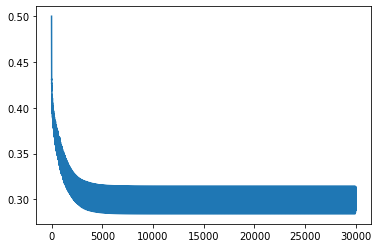

In [7]:
plt.plot(loss_history)



In [8]:
x_t = x_train
h = 1.0/(1.0 + np.exp(-(x_t.dot(w1) + b1))) #sigmoid
y_pred = h.dot(w2) + b2
tr_ac = 1.0 -1/(9*Ntr)*(np.abs(np.argmax(y_train,axis=1) - np.argmax(y_pred, axis=1))).sum()
train_loss = 1/(Ntr)*np.square(y_train - y_pred).sum()
print("train_accuracy = ", tr_ac)
print("train_loss = ", train_loss)

x_t = x_test

h = 1.0/(1.0 + np.exp(-(x_t.dot(w1) + b1))) #sigmoid
y_pred= h.dot(w2) + b2
ts_ac = 1.0 - 1/(9*Nte)*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred, axis=1))).sum()
test_loss = 1/(Nte)*np.square(y_test - y_pred).sum()
print("test_accuracy= ", ts_ac)
print("test_loss = ", test_loss)

train_accuracy =  0.86126
train_loss =  0.5987634134771298
test_accuracy=  0.7791444444444444
test_loss =  0.7399932275822503
